In [1]:
import pandas as pd
import os
import re
import numpy as np
import json
import math
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

In [2]:
def plot_signals(typeHand, typeTask, path_signal, path_point):
    data = json.load(open(path_signal))
    point = json.load(open(path_point))
    frame = []
    znach = []
    if (typeHand==0):
        hand='left hand'
    if (typeHand == 1):
        hand = 'right hand'
    if (typeTask==1):
        for i in range(len(data)):
            if hand in data[i].keys():
                # sum_sqr=(abs(float(data[i]['Left Hand']['JOINT_INDEX_TIP']['X']))-abs(float(data[i]['Left Hand']['JOINT_THUMB_TIP']['X'])))**2+(abs(float(data[i]['Left Hand']['JOINT_INDEX_TIP']['Y']))-abs(float(data[i]['Left Hand']['JOINT_THUMB_TIP']['Y'])))**2+abs((float(data[i]['Left Hand']['JOINT_INDEX_TIP']['Z']))-abs(float(data[i]['Left Hand']['JOINT_THUMB_TIP']['Z'])))**2
                sum_sqr = (float(data[i][hand]['FORE_TIP']['X1']) -
                           float(data[i][hand]['THUMB_TIP']['X1'])) ** 2 + (
                                  float(data[i][hand]['FORE_TIP']['Y1']) -
                                  float(data[i][hand]['THUMB_TIP']['Y1'])) ** 2 + (
                                      float(data[i][hand]['FORE_TIP']['Z1']) -
                                      float(data[i][hand]['THUMB_TIP']['Z1'])) ** 2
                
                distance = math.sqrt(sum_sqr)
                znach.append(distance)
                frame.append(data[i]['frame']/100)
    if (typeTask == 2):
        for i in range(len(data)):
            if hand in data[i].keys():
                # sum_sqr=(abs(float(data[i]['Left Hand']['JOINT_INDEX_TIP']['X']))-abs(float(data[i]['Left Hand']['JOINT_THUMB_TIP']['X'])))**2+(abs(float(data[i]['Left Hand']['JOINT_INDEX_TIP']['Y']))-abs(float(data[i]['Left Hand']['JOINT_THUMB_TIP']['Y'])))**2+abs((float(data[i]['Left Hand']['JOINT_INDEX_TIP']['Z']))-abs(float(data[i]['Left Hand']['JOINT_THUMB_TIP']['Z'])))**2
                sum_sqr = (float(data[i][hand]['MIDDLE_TIP']['X1']) -
                           float(data[i][hand]['CENTRE']['X'])) ** 2 + (
                                  float(data[i][hand]['MIDDLE_TIP']['Y1']) -
                                  float(data[i][hand]['CENTRE']['Y'])) ** 2 + (
                                      float(data[i][hand]['MIDDLE_TIP']['Z1']) -
                                      float(data[i][hand]['CENTRE']['Z'])) ** 2
                distance = math.sqrt(sum_sqr)
                #znach2.append(distance)
                #frame2.append(data[i]['frame']*widthGraf)
                znach.append(distance)
                frame.append(data[i]['frame'])
    if (typeTask == 3):
        for i in range(len(data)):
            if hand in data[i].keys():
                '''
                x_c.append(float(data[i][hand]['LITTLE_DIP']['X1']))
                y_c.append(float(data[i][hand]['LITTLE_DIP']['Y1']))
                #z_c.append(float(data[i]['left_hand']['LITTLE_DIP']['Z3']))
                #znach.append(float(data[i][hand]['LITTLE_DIP']['Z3']))
                znach.append(math.sqrt(float(data[i][hand]['LITTLE_DIP']['Z3'])**2+float(data[i][hand]['LITTLE_DIP']['X3'])**2+float(data[i][hand]['LITTLE_DIP']['Y3'])**2))
                #frame7.append(data[i]['frame']*widthGraf)
                '''
                znach.append(float(data[i][hand]['CENTRE']['Angle']))
                frame.append(data[i]['frame'])
    return frame,znach,point

In [186]:
def rename_files(path):
    for file in os.listdir(path):
        if 'm01' in file:
            rename_file = file.replace('m01','m1')
            os.rename(os.path.join(path,file), os.path.join(path, rename_file))
        if 'm02' in file:
            rename_file = file.replace('m02','m2')
            os.rename(os.path.join(path,file), os.path.join(path, rename_file))
rename_files(r'D:\HEALTHY\Healthy9\r0\hand')
rename_files(r'D:\HEALTHY\Healthy9\r0\mannual_point')

In [205]:
def rename_files(path, name):
    for file in os.listdir(path):
        if name in file:
            rename_file = file.replace(name,'m1')
            os.rename(os.path.join(path,file), os.path.join(path, rename_file))
for r in [1,2,3,4,5,6]: 
    pth = 'D:\\HEALTHY\\Healthy18\\r'+str(r)
    rename_files(pth+'\\hand', 'm'+str(r))
    rename_files(pth+'\\mannual_point', 'm'+str(r))

FileNotFoundError: [WinError 3] Системе не удается найти указанный путь: 'D:\\HEALTHY\\Healthy18\\r6\\hand'

In [35]:
def rename_files(path):
    for file in os.listdir(path):
        if 'right' in file:
            rename_file = file.replace('right','R')
            os.rename(os.path.join(path,file), os.path.join(path, rename_file))
        if 'left' in file:
            rename_file = file.replace('left','L')
            os.rename(os.path.join(path,file), os.path.join(path, rename_file))
rename_files(r'D:\HEALTHY\Healthy13\r0\m1')

In [50]:
def rename_files(path):
    for file in os.listdir(path):
        if ' — копия' in file:
            rename_file = file.split('.lmt')[0].split(' — копия')[0]+'_R'+'.lmt'
            os.rename(os.path.join(path,file), os.path.join(path, rename_file))
        else:
            rename_file = file.split('.lmt')[0]+'_L'+'.lmt'
            os.rename(os.path.join(path,file), os.path.join(path, rename_file))
rename_files(r'D:\HEALTHY\Healthy9\r0\m1')

In [26]:
path_to_dir = "D:\\PD"
for folder in os.listdir(path_to_dir):
    for r in os.listdir(os.path.join(path_to_dir, folder)):
        path = os.path.join(path_to_dir, folder, r)
        if os.path.isdir(os.path.join(path, 'hand')):
                files = os.listdir(os.path.join(path, 'hand'))
                for file in files:
                    if ('TR' in file) & (len(file.split('_'))==4):
                        print(os.path.join(path, 'hand'), file)
                        #rename_file = file.split('_')[0] + '_RL_' + file.split('_')[1] + '_' +file.split('_')[2]
                        #os.rename(os.path.join(path,'hand',file), os.path.join(path, 'hand', rename_file))

D:\PD\Patient29\r0\hand leapRecordingTR_L_m2_Patient29.json
D:\PD\Patient29\r0\hand leapRecordingTR_L_m2_Patient29.txt
D:\PD\Patient29\r0\hand leapRecordingTR_R_m2_Patient29.json
D:\PD\Patient29\r0\hand leapRecordingTR_R_m2_Patient29.txt
D:\PD\Patient30\r0\hand leapRecordingTR_L_m1_Patient30.json
D:\PD\Patient30\r0\hand leapRecordingTR_L_m1_Patient30.txt
D:\PD\Patient30\r0\hand leapRecordingTR_R_m1_Patient30.json
D:\PD\Patient30\r0\hand leapRecordingTR_R_m1_Patient30.txt
D:\PD\Patient31\r0\hand leapRecordingTR_L_m1_Patient31.json
D:\PD\Patient31\r0\hand leapRecordingTR_L_m1_Patient31.txt
D:\PD\Patient31\r0\hand leapRecordingTR_R_m1_Patient31.json
D:\PD\Patient31\r0\hand leapRecordingTR_R_m1_Patient31.txt
D:\PD\Patient32\r0\hand leapRecordingTR_L_m1_Patient32.json
D:\PD\Patient32\r0\hand leapRecordingTR_L_m1_Patient32.txt
D:\PD\Patient32\r0\hand leapRecordingTR_R_m1_Patient32.json
D:\PD\Patient32\r0\hand leapRecordingTR_R_m1_Patient32.txt
D:\PD\Patient33\r0\hand leapRecordingTR_L_m1_Pat

In [28]:
path_to_dir = "D:\\PD"
for folder in os.listdir(path_to_dir):
    for r in os.listdir(os.path.join(path_to_dir, folder)):
        path = os.path.join(path_to_dir, folder, r)
        folders = os.listdir(path)
        ms = [m for m in folders if re.findall(r'm\d+', m)]
        for m in ms:
            if os.path.isdir(os.path.join(path, m)):
                files = os.listdir(os.path.join(path, m))
                for file in files:
                    if 'TR' in file:
                        print(os.path.join(path, m), file)
                        #if 'leapRecordingTR.lmt' in file:
                            #rename_file = 'leapRecordingTR_RL.lmt'
                            #os.rename(os.path.join(path, m, file), os.path.join(path, m, rename_file))

D:\PD\Patient29\r0\m2 leapRecordingTR_L.lmt
D:\PD\Patient29\r0\m2 leapRecordingTR_R.lmt
D:\PD\Patient30\r0\m1 leapRecordingTR_L.lmt
D:\PD\Patient30\r0\m1 leapRecordingTR_R.lmt
D:\PD\Patient31\r0\m1 leapRecordingTR_L.lmt
D:\PD\Patient31\r0\m1 leapRecordingTR_R.lmt
D:\PD\Patient32\r0\m1 leapRecordingTR_L.lmt
D:\PD\Patient32\r0\m1 leapRecordingTR_R.lmt
D:\PD\Patient33\r0\m1 leapRecordingTR_L.lmt
D:\PD\Patient33\r0\m1 leapRecordingTR_R.lmt
D:\PD\Patient34\r0\m2 leapRecordingTR_L.lmt
D:\PD\Patient34\r0\m2 leapRecordingTR_R.lmt
D:\PD\Patient36\r0\m2 leapRecordingTR_L.lmt
D:\PD\Patient36\r0\m2 leapRecordingTR_R.lmt
D:\PD\Patient37\r0\m2 leapRecordingTR_L.lmt
D:\PD\Patient37\r0\m2 leapRecordingTR_R.lmt
D:\PD\Patient38\r0\m2 leapRecordingTR_L.lmt
D:\PD\Patient38\r0\m2 leapRecordingTR_R.lmt
D:\PD\Patient39\r0\m2 leapRecordingTR_L.lmt
D:\PD\Patient39\r0\m2 leapRecordingTR_R.lmt
D:\PD\Patient40\r0\m2 leapRecordingTR_L.lmt
D:\PD\Patient40\r0\m2 leapRecordingTR_R.lmt
D:\PD\Patient41\r0\m2 leapRecord

In [8]:
path_to_dir = "D:\\PD"
for folder in os.listdir(path_to_dir):
    for r in os.listdir(os.path.join(path_to_dir, folder)):
        path = os.path.join(path_to_dir, folder, r, 'hand')
        if os.path.isdir(os.path.join(path)):
            files = os.listdir(os.path.join(path))
            for file in files:
                if (('TR' in file) & ('.json' in file)):
                    print(path, file)

D:\PD\Patient29\r0\hand leapRecordingTR_L_m2_Patient29.json
D:\PD\Patient29\r0\hand leapRecordingTR_R_m2_Patient29.json
D:\PD\Patient30\r0\hand leapRecordingTR_L_m1_Patient30.json
D:\PD\Patient30\r0\hand leapRecordingTR_R_m1_Patient30.json
D:\PD\Patient31\r0\hand leapRecordingTR_L_m1_Patient31.json
D:\PD\Patient31\r0\hand leapRecordingTR_R_m1_Patient31.json
D:\PD\Patient32\r0\hand leapRecordingTR_L_m1_Patient32.json
D:\PD\Patient32\r0\hand leapRecordingTR_R_m1_Patient32.json
D:\PD\Patient33\r0\hand leapRecordingTR_L_m1_Patient33.json
D:\PD\Patient33\r0\hand leapRecordingTR_R_m1_Patient33.json
D:\PD\Patient34\r0\hand leapRecordingTR_L_m2_Patient34.json
D:\PD\Patient34\r0\hand leapRecordingTR_R_m2_Patient34.json
D:\PD\Patient36\r0\hand leapRecordingTR_L_m2_Patient36.json
D:\PD\Patient36\r0\hand leapRecordingTR_R_m2_Patient36.json
D:\PD\Patient37\r0\hand leapRecordingTR_L_m2_Patient37.json
D:\PD\Patient37\r0\hand leapRecordingTR_R_m2_Patient37.json
D:\PD\Patient38\r0\hand leapRecordingTR_

In [ ]:
path = 'E:\\статья\\Patient_PD_new\\'
dict_patients = {}
for i in patients:
    patient = 'Patient'+str(i)
    for file in os.listdir(os.path.join(path, patient, 'hand')):
        if '.json' in file:
            if not 'TR' in file:
                if 'L' in file:
                    type_hand = 0
                else: 
                    type_hand = 1
                dict_patients.update({file.split('.')[0]:{
                    'path_to_signal':os.path.join(path, patient, 'hand',file),
                    'path_to_point':np.NaN,
                'typeTask':int(file.split('leapRecording')[1].split('_')[0]),
                    'typeHand':type_hand, 'Patient':patient
                }})
for i in patients:
    patient = 'Patient'+str(i)
    for file in os.listdir(os.path.join(path, patient, 'mannual_point')):
        if '_'.join(file.split('_')[0:4]) in dict_patients.keys():
            dict_patients['_'.join(file.split('_')[0:4])]['path_to_point'] = os.path.join(path, patient,'mannual_point',file)

In [206]:
columns = ['path_to_user', 'r', 'm', 'exersise', 'hand', 'lmt_type', 'lmt', 'json', 'mannual_point', 'lmt_weight', 'json_weight', 'json_length', 'hand_type_in_json']
files_exp = ['leapRecording1_L.lmt','leapRecording1_R.lmt','leapRecording2_L.lmt','leapRecording2_R.lmt','leapRecording3_L.lmt','leapRecording3_R.lmt','leapRecordingTR_L.lmt','leapRecordingTR_R.lmt']
path_to_dir = "D:\\HEALTHY"
result = []
for folder in os.listdir(path_to_dir):
    for r in os.listdir(os.path.join(path_to_dir, folder)):
        path = os.path.join(path_to_dir, folder, r)
        folders = os.listdir(path)
        ms = [m for m in folders if re.findall(r'm\d+', m)]
        for m in ms:
            if os.path.isdir(os.path.join(path, m)):
                files = os.listdir(os.path.join(path, m))
                for file in files_exp:
                    if os.path.isfile(os.path.join(path, m, file)):
                        file_size = os.stat(os.path.join(path, m, file)).st_size
                        file_flag = True
                    else:
                        file_size = np.NaN
                        file_flag = False
                    files_json = os.listdir(os.path.join(path, 'hand'))
                    file_json = [file_j for file_j in files_json if file.split('.lmt')[0]+'_'+m in file_j]
                    if len(file_json)==0:
                        file_json_name = np.NaN
                        file_size_json = np.NaN
                        file_flag_json = False
                        json_length = np.NaN
                        hand_L_in_json = np.NaN
                        hand_R_in_json = np.NaN
                    else:
                        file_json_name = file_json[0]
                        file_size_json = os.stat(os.path.join(path,'hand',file_json_name)).st_size
                        file_flag_json = True
                        data = json.load(open(os.path.join(path,'hand',file_json_name)))
                        json_length = len(data)
                        hand_L_in_json = 0
                        hand_R_in_json = 0
                        for i in range(len(data)):
                            if 'left hand' in data[i]:
                                hand_L_in_json = hand_L_in_json + 1
                            if 'right hand' in data[i]:
                                hand_R_in_json = hand_R_in_json + 1
                                
                        
                    if os.path.isdir(os.path.join(path, 'mannual_point')):
                        files_mannual = os.listdir(os.path.join(path, 'mannual_point'))
                        file_mannual = [file_m for file_m in files_mannual if file.split('.lmt')[0]+'_'+m in file_m]
                        if len(file_mannual)==0:
                            file_mannual_name = np.NaN
                            file_size_mannual = np.NaN
                            file_flag_mannual = False
                        else:
                            file_mannual_name = file_mannual[0]
                            file_size_mannual = os.stat(os.path.join(path,'mannual_point',file_mannual_name)).st_size
                            file_flag_mannual = True

                            path_to_mannual = os.path.join(path_to_dir, folder, r,'mannual_point', file_mannual_name)
                            data = json.load(open(path_to_mannual))
                            mannual_point_length = len(data)
                            signal_x = []
                            for i in range(len(data)):
                                signal_x.append(data[i]['X'])
                            mannual_point_X = max(signal_x)
                    else:
                        file_mannual_name = np.NaN
                        file_size_mannual = np.NaN
                        file_flag_mannual = False
                    result.append({
                        'folder':folder,
                        'r':r,
                        'm':m,
                        'exersise':file.split('_')[0].split('leapRecording')[1],
                        'hand':file.split('_')[1].split('.lmt')[0],
                        'lmt_type': file,
                        'lmt': file_flag,
                        'lmt_weight':file_size,
                        'json': file_json_name,
                        'mannual_point': file_mannual_name,
                        'mannual_point_length': mannual_point_length,
                        'mannual_point_X': mannual_point_X,
                        'json_weight':file_size_json, 
                        'json_length':json_length,
                        'hand_L_in_json':hand_L_in_json,
                        'hand_R_in_json':hand_R_in_json,
                        
                    })
                        

In [207]:
df = pd.DataFrame(result)

In [208]:
df

folder   r   m exersise hand               lmt_type    lmt  lmt_weight  \
0    Healthy1  r0  m1        1    L   leapRecording1_L.lmt   True  13223067.0   
1    Healthy1  r0  m1        1    R   leapRecording1_R.lmt   True  13223067.0   
2    Healthy1  r0  m1        2    L   leapRecording2_L.lmt   True  13072488.0   
3    Healthy1  r0  m1        2    R   leapRecording2_R.lmt   True  13072488.0   
4    Healthy1  r0  m1        3    L   leapRecording3_L.lmt   True  12018435.0   
..        ...  ..  ..      ...  ...                    ...    ...         ...   
779  Healthy9  r5  m1        2    R   leapRecording2_R.lmt   True   5508432.0   
780  Healthy9  r5  m1        3    L   leapRecording3_L.lmt   True   6429303.0   
781  Healthy9  r5  m1        3    R   leapRecording3_R.lmt   True   6107418.0   
782  Healthy9  r5  m1       TR    L  leapRecordingTR_L.lmt  False         NaN   
783  Healthy9  r5  m1       TR    R  leapRecordingTR_R.lmt  False         NaN   

                                  json  \
0    leapRecording1_L_m1_Healthy1.json   
1    leapRecording1_R_m1_Healthy1.json   
2    leapRecording2_L_m1_Healthy1.json   
3    leapRecording2_R_m1_Healthy1.json   
4    leapRecording3_L_m1_Healthy1.json   
..                                 ...   
779  leapRecording2_R_m1_Healthy9.json   
780  leapRecording3_L_m1_Healthy9.json   
781  leapRecording3_R_m1_Healthy9.json   
782                                NaN   
783                                NaN   

                                         mannual_point  mannual_point_length  \
0    leapRecording1_L_m1_Healthy1_point_0,0200_10_5...                   113   
1    leapRecording1_R_m1_Healthy1_point_0,0070_10_5...                   113   
2    leapRecording2_L_m1_Healthy1_point_0,0200_10_5...                    99   
3    leapRecording2_R_m1_Healthy1_point_0,0200_10_5...                    99   
4    leapRecording3_L_m1_Healthy1_point_0,0200_10_5...                   105   
..                                                 ...                   ...   
779  leapRecording2_R_m1_Healthy9_point_0,0070_15_1...                   145   
780  leapRecording3_L_m1_Healthy9_point_0,0200_10_5...                    73   
781  leapRecording3_R_m1_Healthy9_point_0,0100_10_5...                   129   
782                                                NaN                   129   
783                                                NaN                   129   

     mannual_point_X  json_weight  json_length  hand_L_in_json  hand_R_in_json  
0             2353.0   16652667.0       4742.0          2371.0          2371.0  
1             2352.0   16652667.0       4742.0          2371.0          2371.0  
2             2322.0   16299343.0       4688.0          2344.0          2344.0  
3             2319.0   16299343.0       4688.0          2344.0          2344.0  
4             2126.0   19249531.0       4310.0          2155.0          2155.0  
..               ...          ...          ...             ...             ...  
779           1966.0    8701120.0       1968.0             0.0          1968.0  
780           2250.0   10182384.0       2297.0          2297.0             0.0  
781           2168.0    9639366.0       2182.0             0.0          2182.0  
782           2168.0          NaN          NaN             NaN             NaN  
783           2168.0          NaN          NaN             NaN             NaN  

[784 rows x 16 columns]

In [209]:
#отсутствие lmt файлов
df[(df['lmt']==False) & (df['exersise']!='TR')]

Empty DataFrame
Columns: [folder, r, m, exersise, hand, lmt_type, lmt, lmt_weight, json, mannual_point, mannual_point_length, mannual_point_X, json_weight, json_length, hand_L_in_json, hand_R_in_json]
Index: []

In [210]:
#наличие разметки ручной разметки для .json
df[df['mannual_point'].isna() & (df['exersise']!='TR')& (df['lmt']==True)]

folder   r   m exersise hand              lmt_type   lmt  lmt_weight  \
156  Healthy12  r3  m1        3    L  leapRecording3_L.lmt  True   6613600.0   
325  Healthy16  r2  m1        3    R  leapRecording3_R.lmt  True   9933846.0   
576   Healthy5  r0  m1        1    L  leapRecording1_L.lmt  True  10834967.0   
577   Healthy5  r0  m1        1    R  leapRecording1_R.lmt  True  10834967.0   
578   Healthy5  r0  m1        2    L  leapRecording2_L.lmt  True  11544390.0   
579   Healthy5  r0  m1        2    R  leapRecording2_R.lmt  True  11544390.0   
580   Healthy5  r0  m1        3    L  leapRecording3_L.lmt  True  12871716.0   
581   Healthy5  r0  m1        3    R  leapRecording3_R.lmt  True  12871716.0   
584   Healthy5  r0  m2        1    L  leapRecording1_L.lmt  True   5986400.0   
585   Healthy5  r0  m2        1    R  leapRecording1_R.lmt  True   5983876.0   
586   Healthy5  r0  m2        2    L  leapRecording2_L.lmt  True   5241600.0   
587   Healthy5  r0  m2        2    R  leapRecording2_R.lmt  True   5745600.0   
588   Healthy5  r0  m2        3    L  leapRecording3_L.lmt  True   5807890.0   
589   Healthy5  r0  m2        3    R  leapRecording3_R.lmt  True   5521600.0   

                                   json mannual_point  mannual_point_length  \
156  leapRecording3_L_m1_Healthy12.json           NaN                   125   
325  leapRecording3_R_m1_Healthy16.json           NaN                   123   
576                                 NaN           NaN                   105   
577                                 NaN           NaN                   105   
578                                 NaN           NaN                   105   
579                                 NaN           NaN                   105   
580                                 NaN           NaN                   105   
581                                 NaN           NaN                   105   
584                                 NaN           NaN                   105   
585                                 NaN           NaN                   105   
586                                 NaN           NaN                   105   
587                                 NaN           NaN                   105   
588                                 NaN           NaN                   105   
589                                 NaN           NaN                   105   

     mannual_point_X  json_weight  json_length  hand_L_in_json  hand_R_in_json  
156           2330.0   10475644.0       2362.0          2362.0             0.0  
325           2292.0   15917967.0       3556.0           998.0          2558.0  
576           2054.0          NaN          NaN             NaN             NaN  
577           2054.0          NaN          NaN             NaN             NaN  
578           2054.0          NaN          NaN             NaN             NaN  
579           2054.0          NaN          NaN             NaN             NaN  
580           2054.0          NaN          NaN             NaN             NaN  
581           2054.0          NaN          NaN             NaN             NaN  
584           2054.0          NaN          NaN             NaN             NaN  
585           2054.0          NaN          NaN             NaN             NaN  
586           2054.0          NaN          NaN             NaN             NaN  
587           2054.0          NaN          NaN             NaN             NaN  
588           2054.0          NaN          NaN             NaN             NaN  
589           2054.0          NaN          NaN             NaN             NaN

In [211]:
df[df['json'].isna() & (df['exersise']!='TR')& (df['lmt']==True)]

folder   r   m exersise hand              lmt_type   lmt  lmt_weight  \
576  Healthy5  r0  m1        1    L  leapRecording1_L.lmt  True  10834967.0   
577  Healthy5  r0  m1        1    R  leapRecording1_R.lmt  True  10834967.0   
578  Healthy5  r0  m1        2    L  leapRecording2_L.lmt  True  11544390.0   
579  Healthy5  r0  m1        2    R  leapRecording2_R.lmt  True  11544390.0   
580  Healthy5  r0  m1        3    L  leapRecording3_L.lmt  True  12871716.0   
581  Healthy5  r0  m1        3    R  leapRecording3_R.lmt  True  12871716.0   
584  Healthy5  r0  m2        1    L  leapRecording1_L.lmt  True   5986400.0   
585  Healthy5  r0  m2        1    R  leapRecording1_R.lmt  True   5983876.0   
586  Healthy5  r0  m2        2    L  leapRecording2_L.lmt  True   5241600.0   
587  Healthy5  r0  m2        2    R  leapRecording2_R.lmt  True   5745600.0   
588  Healthy5  r0  m2        3    L  leapRecording3_L.lmt  True   5807890.0   
589  Healthy5  r0  m2        3    R  leapRecording3_R.lmt  True   5521600.0   

    json mannual_point  mannual_point_length  mannual_point_X  json_weight  \
576  NaN           NaN                   105           2054.0          NaN   
577  NaN           NaN                   105           2054.0          NaN   
578  NaN           NaN                   105           2054.0          NaN   
579  NaN           NaN                   105           2054.0          NaN   
580  NaN           NaN                   105           2054.0          NaN   
581  NaN           NaN                   105           2054.0          NaN   
584  NaN           NaN                   105           2054.0          NaN   
585  NaN           NaN                   105           2054.0          NaN   
586  NaN           NaN                   105           2054.0          NaN   
587  NaN           NaN                   105           2054.0          NaN   
588  NaN           NaN                   105           2054.0          NaN   
589  NaN           NaN                   105           2054.0          NaN   

     json_length  hand_L_in_json  hand_R_in_json  
576          NaN             NaN             NaN  
577          NaN             NaN             NaN  
578          NaN             NaN             NaN  
579          NaN             NaN             NaN  
580          NaN             NaN             NaN  
581          NaN             NaN             NaN  
584          NaN             NaN             NaN  
585          NaN             NaN             NaN  
586          NaN             NaN             NaN  
587          NaN             NaN             NaN  
588          NaN             NaN             NaN  
589          NaN             NaN             NaN

In [75]:
df[df['folder']=='Patient48'][['folder','r','m','exersise','hand',	'hand_L_in_json','hand_R_in_json','R']]

folder   r   m exersise hand  hand_L_in_json  hand_R_in_json      R
648  Patient48  r0  m1        1    L          2366.0             0.0  False
649  Patient48  r0  m1        1    R             0.0          2569.0   True
650  Patient48  r0  m1        2    L          2446.0             0.0  False
651  Patient48  r0  m1        2    R             0.0           437.0   True
652  Patient48  r0  m1        3    L          2544.0             0.0  False
653  Patient48  r0  m1        3    R             0.0          2411.0   True
654  Patient48  r0  m1       TR    L             NaN             NaN  False
655  Patient48  r0  m1       TR    R             NaN             NaN  False
656  Patient48  r0  m2        1    L          2376.0             0.0  False
657  Patient48  r0  m2        1    R            47.0          2099.0   True
658  Patient48  r0  m2        2    L          2069.0             0.0  False
659  Patient48  r0  m2        2    R             0.0          2123.0   True
660  Patient48  r0  m2        3    L          2192.0             0.0  False
661  Patient48  r0  m2        3    R           607.0          1450.0   True
662  Patient48  r0  m2       TR    L             NaN             NaN  False
663  Patient48  r0  m2       TR    R             NaN             NaN  False

In [212]:
df['R'] = ((df['hand_R_in_json'] > df['hand_L_in_json']) | (df['hand_R_in_json'] == df['hand_L_in_json']))
df_hand = df[(df['hand'] == 'R') & (df['exersise']!='TR') & (df['lmt']==True)]
df_hand[df_hand['R']==False]

folder   r   m exersise hand              lmt_type   lmt  lmt_weight  \
153  Healthy12  r3  m1        1    R  leapRecording1_R.lmt  True   5817124.0   
281  Healthy15  r4  m1        1    R  leapRecording1_R.lmt  True   6656022.0   
283  Healthy15  r4  m1        2    R  leapRecording2_R.lmt  True   6510474.0   
285  Healthy15  r4  m1        3    R  leapRecording3_R.lmt  True   8858835.0   
321  Healthy16  r2  m1        1    R  leapRecording1_R.lmt  True   5644800.0   
577   Healthy5  r0  m1        1    R  leapRecording1_R.lmt  True  10834967.0   
579   Healthy5  r0  m1        2    R  leapRecording2_R.lmt  True  11544390.0   
581   Healthy5  r0  m1        3    R  leapRecording3_R.lmt  True  12871716.0   
585   Healthy5  r0  m2        1    R  leapRecording1_R.lmt  True   5983876.0   
587   Healthy5  r0  m2        2    R  leapRecording2_R.lmt  True   5745600.0   
589   Healthy5  r0  m2        3    R  leapRecording3_R.lmt  True   5521600.0   

                                   json  \
153  leapRecording1_R_m1_Healthy12.json   
281  leapRecording1_R_m1_Healthy15.json   
283  leapRecording2_R_m1_Healthy15.json   
285  leapRecording3_R_m1_Healthy15.json   
321  leapRecording1_R_m1_Healthy16.json   
577                                 NaN   
579                                 NaN   
581                                 NaN   
585                                 NaN   
587                                 NaN   
589                                 NaN   

                                         mannual_point  mannual_point_length  \
153  leapRecording1_R_m1_Healthy12_point_0,0100_10_...                   153   
281  leapRecording1_R_m1_Healthy15_point_0,0070_10_...                   187   
283  leapRecording2_R_m1_Healthy15_point_0,0100_10_...                    99   
285  leapRecording3_R_m1_Healthy15_point_0,0100_10_...                   141   
321  leapRecording1_R_m1_Healthy16_point_0,0100_10_...                   105   
577                                                NaN                   105   
579                                                NaN                   105   
581                                                NaN                   105   
585                                                NaN                   105   
587                                                NaN                   105   
589                                                NaN                   105   

     mannual_point_X  json_weight  json_length  hand_L_in_json  \
153           1992.0    9265816.0       2076.0          2027.0   
281           2321.0   10602616.0       2378.0          2378.0   
283           2418.0   10287619.0       2326.0          2326.0   
285           2329.0   14049517.0       3165.0          3165.0   
321           1983.0    9045666.0       2016.0          2016.0   
577           2054.0          NaN          NaN             NaN   
579           2054.0          NaN          NaN             NaN   
581           2054.0          NaN          NaN             NaN   
585           2054.0          NaN          NaN             NaN   
587           2054.0          NaN          NaN             NaN   
589           2054.0          NaN          NaN             NaN   

     hand_R_in_json      R  
153            49.0  False  
281             0.0  False  
283             0.0  False  
285             0.0  False  
321             0.0  False  
577             NaN  False  
579             NaN  False  
581             NaN  False  
585             NaN  False  
587             NaN  False  
589             NaN  False

In [213]:
df[(df['exersise']!='TR')].dropna(subset = ['lmt_weight']).sort_values('lmt_weight')

folder   r   m exersise hand              lmt_type   lmt  lmt_weight  \
425  Healthy2  r1  m1        1    R  leapRecording1_R.lmt  True   2783200.0   
429  Healthy2  r1  m1        3    R  leapRecording3_R.lmt  True   3155600.0   
777  Healthy9  r5  m1        1    R  leapRecording1_R.lmt  True   3400785.0   
424  Healthy2  r1  m1        1    L  leapRecording1_L.lmt  True   3497488.0   
426  Healthy2  r1  m1        2    L  leapRecording2_L.lmt  True   3522400.0   
..        ...  ..  ..      ...  ...                   ...   ...         ...   
464  Healthy3  r0  m1        1    L  leapRecording1_L.lmt  True  14199042.0   
408  Healthy2  r0  m1        1    L  leapRecording1_L.lmt  True  14450007.0   
409  Healthy2  r0  m1        1    R  leapRecording1_R.lmt  True  14450007.0   
440  Healthy2  r3  m1        1    L  leapRecording1_L.lmt  True  16680807.0   
441  Healthy2  r3  m1        1    R  leapRecording1_R.lmt  True  16680807.0   

                                  json  \
425  leapRecording1_R_m1_Healthy2.json   
429  leapRecording3_R_m1_Healthy2.json   
777  leapRecording1_R_m1_Healthy9.json   
424  leapRecording1_L_m1_Healthy2.json   
426  leapRecording2_L_m1_Healthy2.json   
..                                 ...   
464  leapRecording1_L_m1_Healthy3.json   
408  leapRecording1_L_m1_Healthy2.json   
409  leapRecording1_R_m1_Healthy2.json   
440  leapRecording1_L_m1_Healthy2.json   
441  leapRecording1_R_m1_Healthy2.json   

                                         mannual_point  mannual_point_length  \
425  leapRecording1_R_m1_Healthy2_point_0,0070_5_5....                   171   
429  leapRecording3_R_m1_Healthy2_point_0,0100_10_5...                    87   
777  leapRecording1_R_m1_Healthy9_point_0,0070_10_1...                   173   
424  leapRecording1_L_m1_Healthy2_point_0,0100_10_5...                   159   
426  leapRecording2_L_m1_Healthy2_point_0,0070_10_1...                   127   
..                                                 ...                   ...   
464  leapRecording1_L_m1_Healthy3_point_0,0090_10_5...                   125   
408  leapRecording1_L_m1_Healthy2_point_0,0090_10_5...                   159   
409  leapRecording1_R_m1_Healthy2_point_0,0060_10_5...                   159   
440  leapRecording1_L_m1_Healthy2_point_0,0070_10_5...                   205   
441  leapRecording1_R_m1_Healthy2_point_0,0070_10_1...                   209   

     mannual_point_X  json_weight  json_length  hand_L_in_json  \
425            990.0    4405347.0        994.0             0.0   
429           1116.0    5026826.0       1127.0             0.0   
777           1209.0    5373920.0       1215.0             0.0   
424           1225.0    5585630.0       1247.0          1247.0   
426           1224.0    5625029.0       1258.0          1258.0   
..               ...          ...          ...             ...   
464           2517.0   17796659.0       5092.0          2546.0   
408           2583.0   18123658.0       5182.0          2591.0   
409           2582.0   18123658.0       5182.0          2591.0   
440           2989.0   26652555.0       5982.0          2991.0   
441           2987.0   26652555.0       5982.0          2991.0   

     hand_R_in_json      R  
425           994.0   True  
429          1127.0   True  
777          1215.0   True  
424             0.0  False  
426             0.0  False  
..              ...    ...  
464          2546.0   True  
408          2591.0   True  
409          2591.0   True  
440          2991.0   True  
441          2991.0   True  

[588 rows x 17 columns]

In [214]:
df2 = df[(df['exersise']!='TR')]
df2 = df2[(df2['mannual_point_X']<1680) & (df2['lmt']==True)].dropna(subset = ['json','mannual_point']).sort_values('mannual_point_X')
df2

folder   r   m exersise hand              lmt_type   lmt  lmt_weight  \
288  Healthy15  r5  m1        1    L  leapRecording1_L.lmt  True   4149722.0   
425   Healthy2  r1  m1        1    R  leapRecording1_R.lmt  True   2783200.0   
429   Healthy2  r1  m1        3    R  leapRecording3_R.lmt  True   3155600.0   
777   Healthy9  r5  m1        1    R  leapRecording1_R.lmt  True   3400785.0   
426   Healthy2  r1  m1        2    L  leapRecording2_L.lmt  True   3522400.0   
424   Healthy2  r1  m1        1    L  leapRecording1_L.lmt  True   3497488.0   
427   Healthy2  r1  m1        2    R  leapRecording2_R.lmt  True   3647268.0   
776   Healthy9  r5  m1        1    L  leapRecording1_L.lmt  True   3991374.0   
555   Healthy4  r3  m1        2    R  leapRecording2_R.lmt  True   4321838.0   
220  Healthy14  r0  m1        3    L  leapRecording3_L.lmt  True   9293141.0   
26   Healthy10  r0  m2        2    L  leapRecording2_L.lmt  True   4541600.0   
227  Healthy14  r0  m2        2    R  leapRecording2_R.lmt  True   4562370.0   
299  Healthy16  r0  m1        2    R  leapRecording2_R.lmt  True   9130792.0   
298  Healthy16  r0  m1        2    L  leapRecording2_L.lmt  True   9130792.0   
21   Healthy10  r0  m1        3    R  leapRecording3_R.lmt  True   9308013.0   
297  Healthy16  r0  m1        1    R  leapRecording1_R.lmt  True   9433798.0   
19   Healthy10  r0  m1        2    R  leapRecording2_R.lmt  True   9241089.0   
18   Healthy10  r0  m1        2    L  leapRecording2_L.lmt  True   9241089.0   
296  Healthy16  r0  m1        1    L  leapRecording1_L.lmt  True   9433798.0   
229  Healthy14  r0  m2        3    R  leapRecording3_R.lmt  True   4693923.0   
363  Healthy17  r0  m2        2    R  leapRecording2_R.lmt  True   4703490.0   
218  Healthy14  r0  m1        2    L  leapRecording2_L.lmt  True   9393428.0   
217  Healthy14  r0  m1        1    R  leapRecording1_R.lmt  True   9289616.0   
216  Healthy14  r0  m1        1    L  leapRecording1_L.lmt  True   9289616.0   
361  Healthy17  r0  m2        1    R  leapRecording1_R.lmt  True   4732035.0   
28   Healthy10  r0  m2        3    L  leapRecording3_L.lmt  True   4754400.0   
20   Healthy10  r0  m1        3    L  leapRecording3_L.lmt  True   9308013.0   
251  Healthy15  r0  m2        2    R  leapRecording2_R.lmt  True   4737645.0   
301  Healthy16  r0  m1        3    R  leapRecording3_R.lmt  True   9415780.0   
300  Healthy16  r0  m1        3    L  leapRecording3_L.lmt  True   9415780.0   
219  Healthy14  r0  m1        2    R  leapRecording2_R.lmt  True   9393428.0   
253  Healthy15  r0  m2        3    R  leapRecording3_R.lmt  True   4729230.0   
24   Healthy10  r0  m2        1    L  leapRecording1_L.lmt  True   4748800.0   

                                   json  \
288  leapRecording1_L_m1_Healthy15.json   
425   leapRecording1_R_m1_Healthy2.json   
429   leapRecording3_R_m1_Healthy2.json   
777   leapRecording1_R_m1_Healthy9.json   
426   leapRecording2_L_m1_Healthy2.json   
424   leapRecording1_L_m1_Healthy2.json   
427   leapRecording2_R_m1_Healthy2.json   
776   leapRecording1_L_m1_Healthy9.json   
555   leapRecording2_R_m1_Healthy4.json   
220  leapRecording3_L_m1_Healthy14.json   
26   leapRecording2_L_m2_Healthy10.json   
227  leapRecording2_R_m2_Healthy14.json   
299  leapRecording2_R_m1_Healthy16.json   
298  leapRecording2_L_m1_Healthy16.json   
21   leapRecording3_R_m1_Healthy10.json   
297  leapRecording1_R_m1_Healthy16.json   
19   leapRecording2_R_m1_Healthy10.json   
18   leapRecording2_L_m1_Healthy10.json   
296  leapRecording1_L_m1_Healthy16.json   
229  leapRecording3_R_m2_Healthy14.json   
363  leapRecording2_R_m2_Healthy17.json   
218  leapRecording2_L_m1_Healthy14.json   
217  leapRecording1_R_m1_Healthy14.json   
216  leapRecording1_L_m1_Healthy14.json   
361  leapRecording1_R_m2_Healthy17.json   
28   leapRecording3_L_m2_Healthy10.json   
20   leapRecording3_L_m1_Healthy10.json   
251  leapRecording2_R_m2_Healthy15.json   
301  leapRecording3_R_m1_Healthy16.json 

1674.0

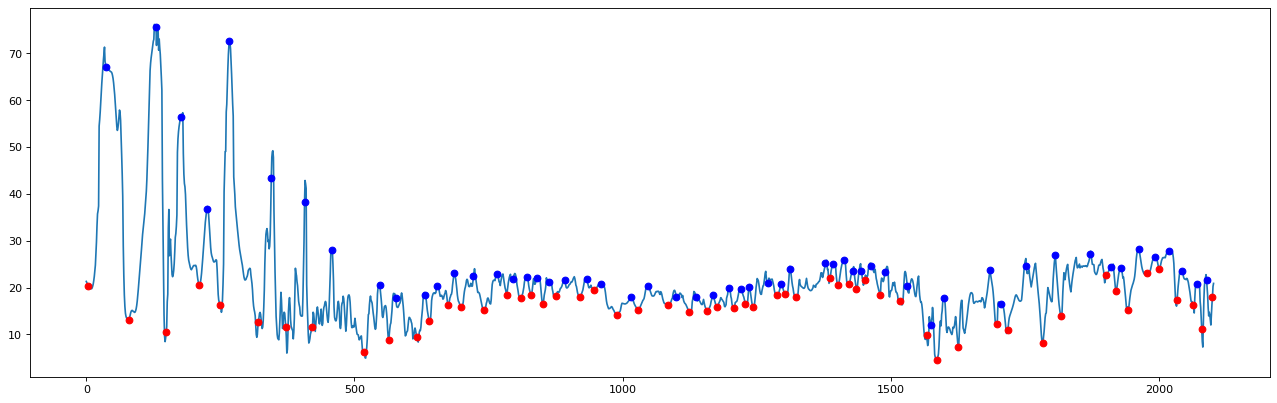

In [15]:
path_signal = r'D:\PD\Patient65\r0\hand\leapRecording1_L_m2_patient65.json'
path_point = r'D:\PD\Patient65\r0\mannual_point\leapRecording1_L_m2_patient65_point_0,0100_10_5.json'
frame,znach,point= plot_signals(1, 1, path_signal, path_point)
figure(figsize=(20, 6), dpi=80)
plt.plot(znach)
for i in range(len(point)):
    if point[i]['Type']==0:
        plt.plot(point[i]['X'], point[i]['Y'], 'o', color = 'red')
    else:
        plt.plot(point[i]['X'], point[i]['Y'], 'o', color = 'blue')
plt.show()

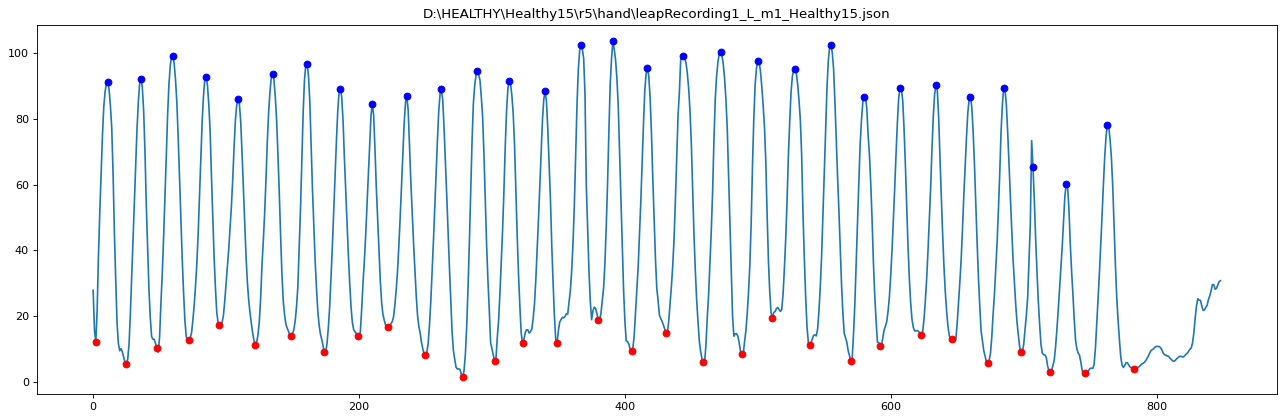

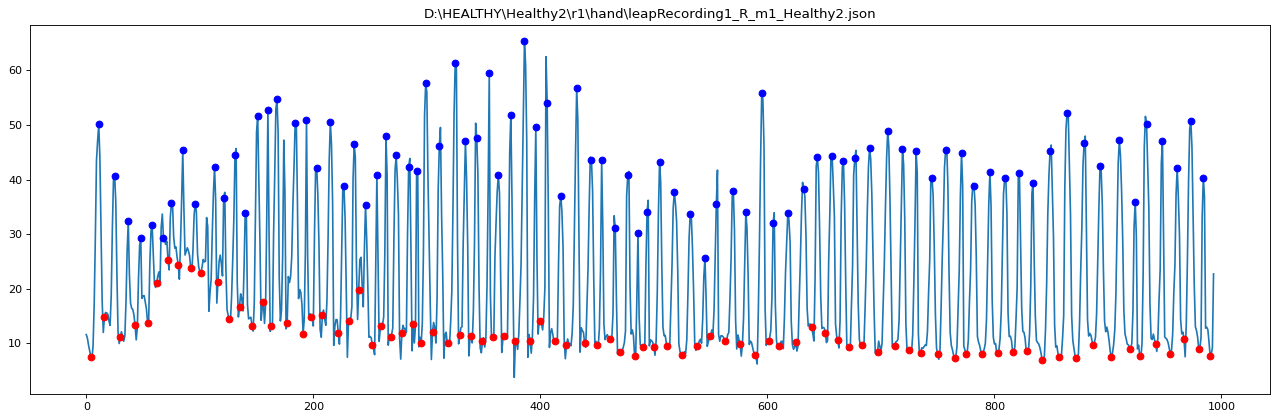

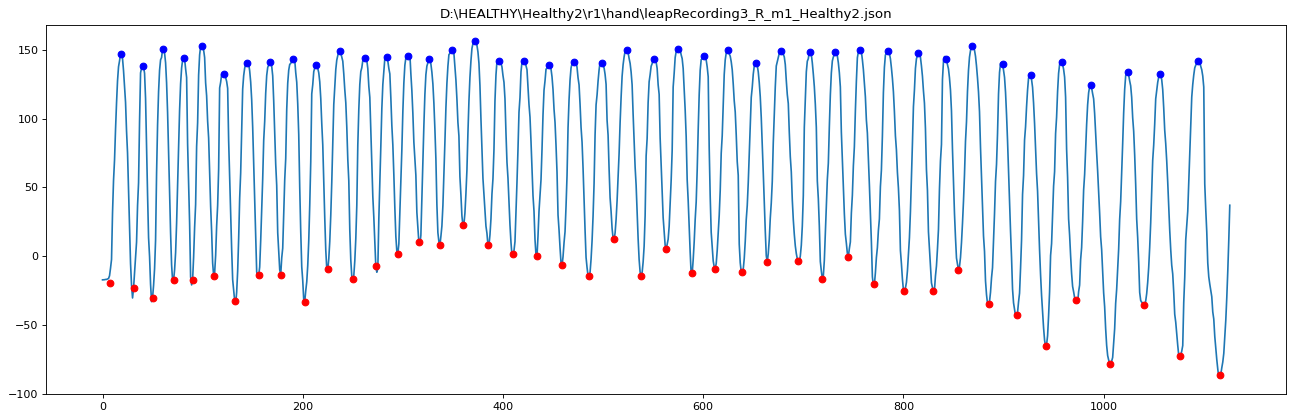

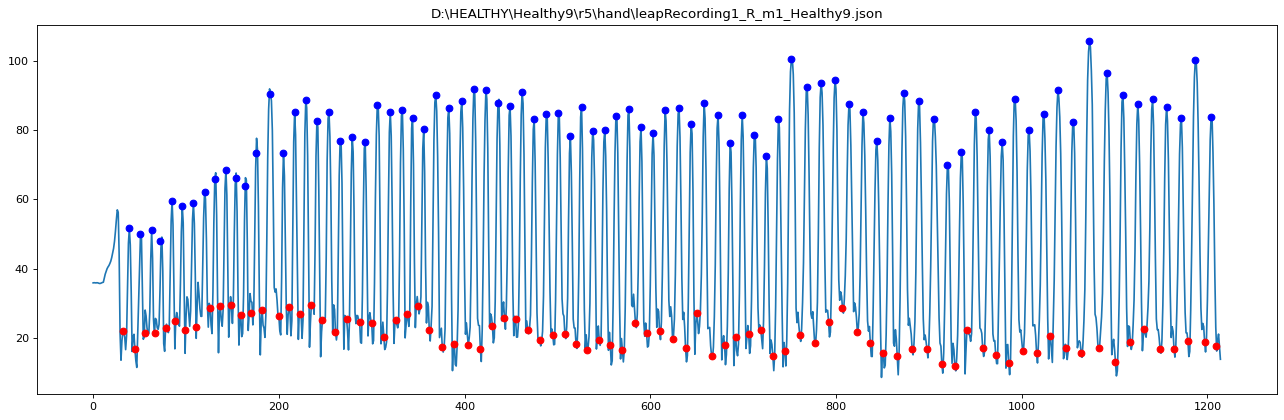

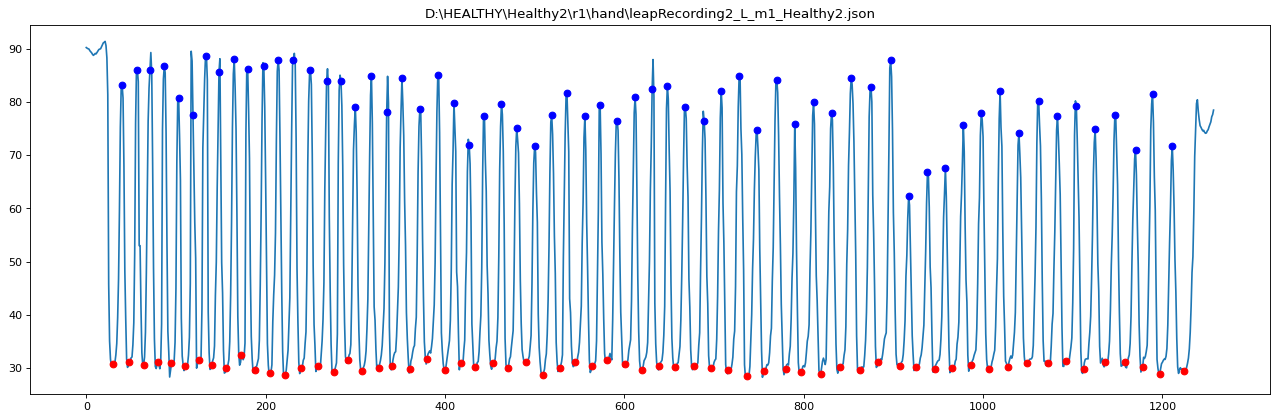

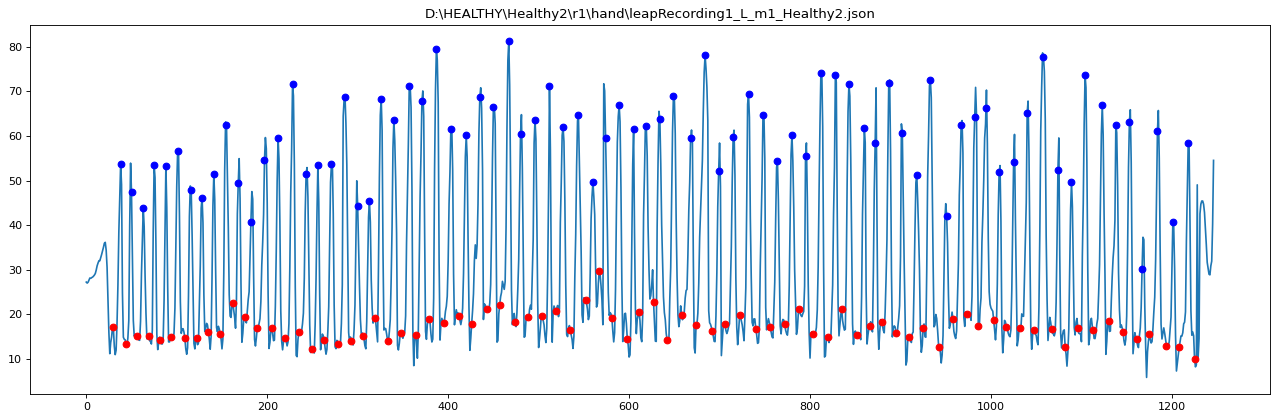

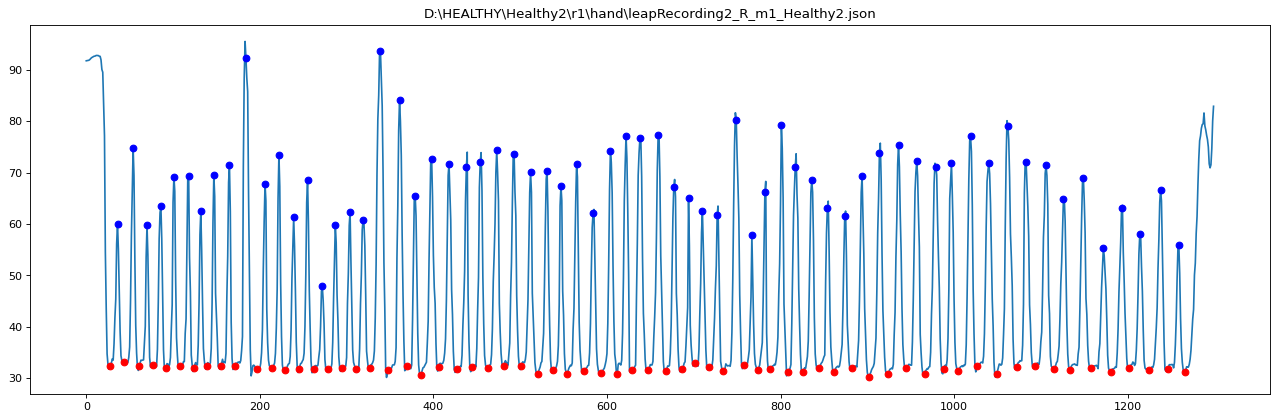

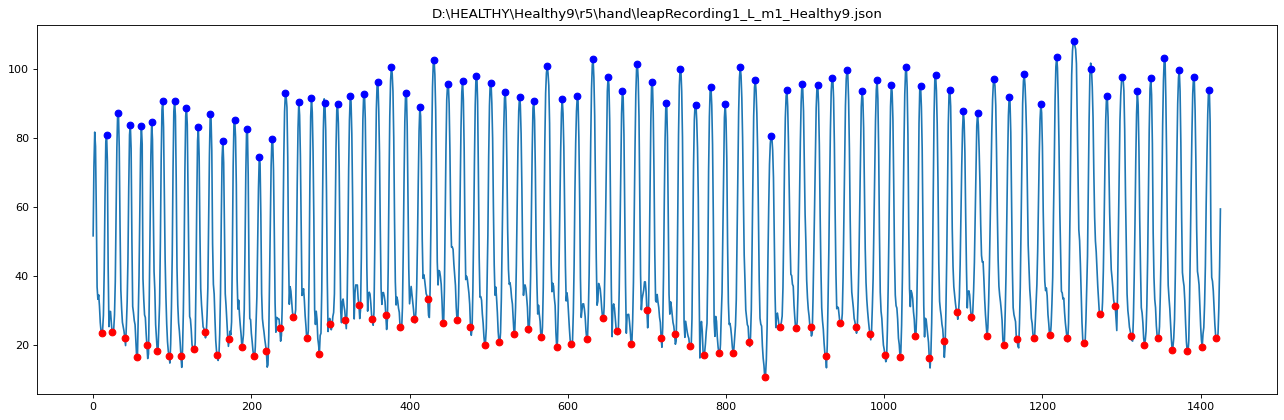

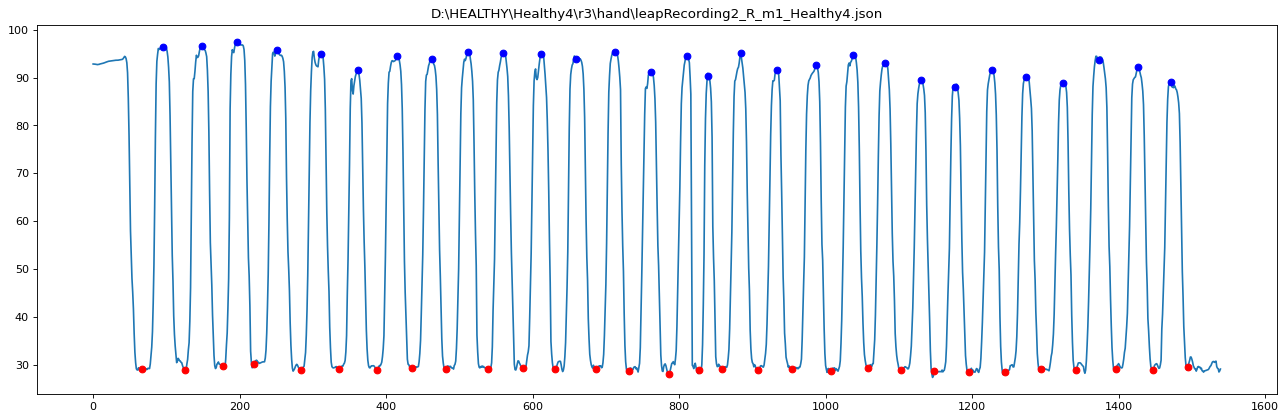

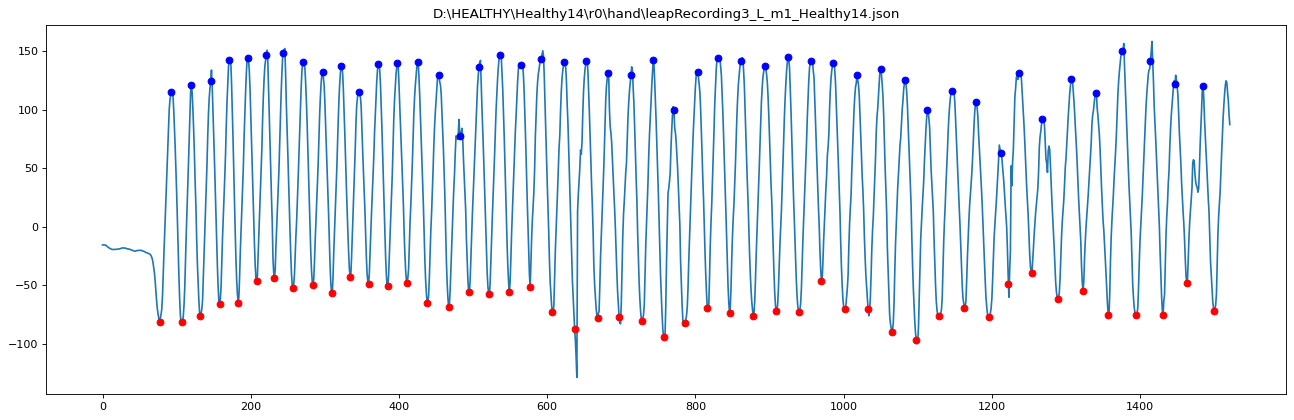

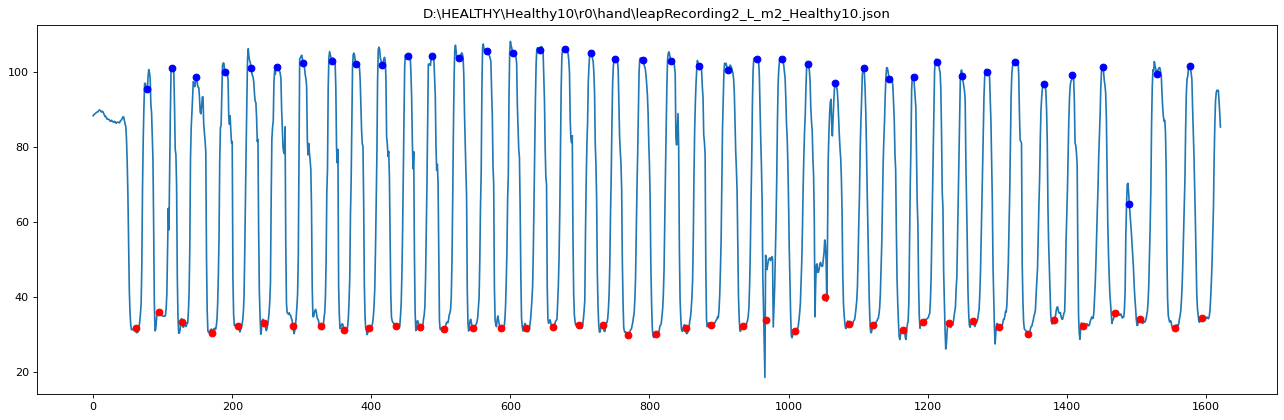

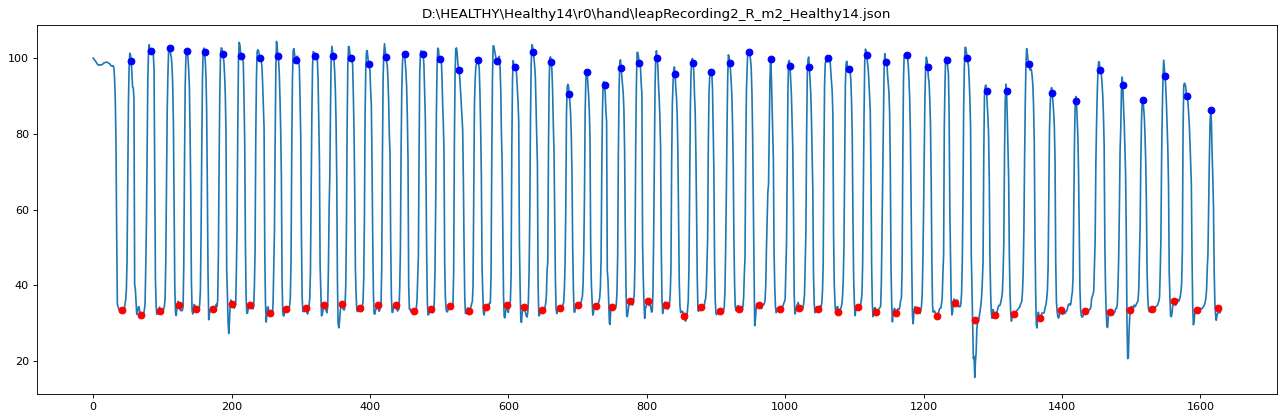

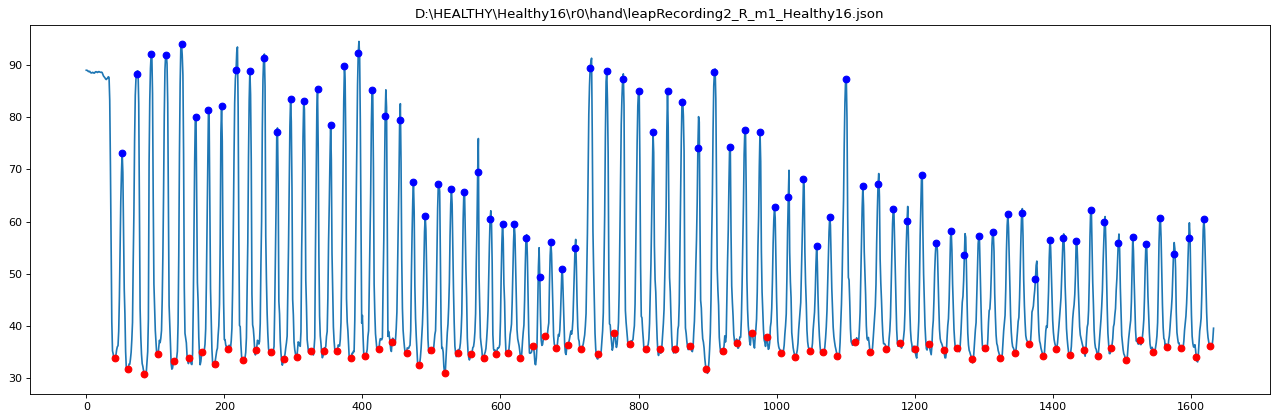

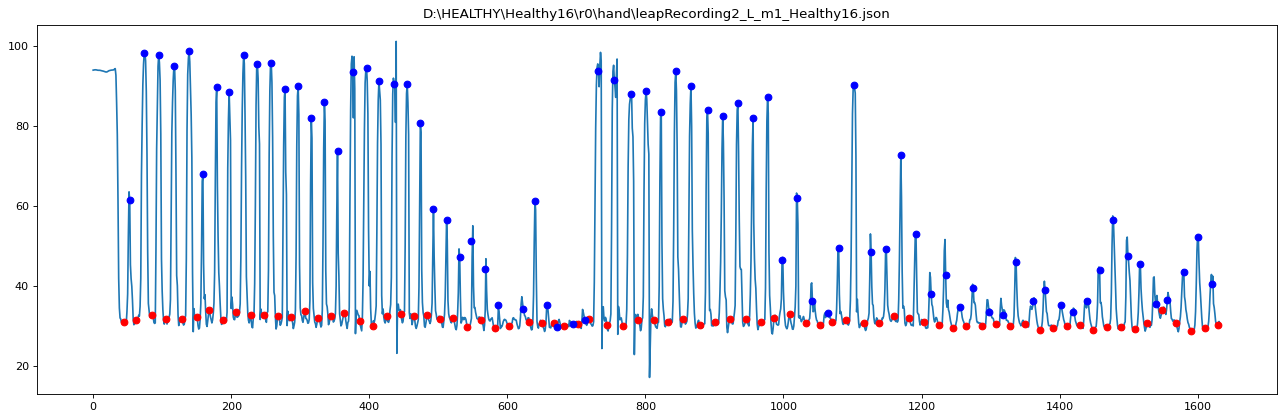

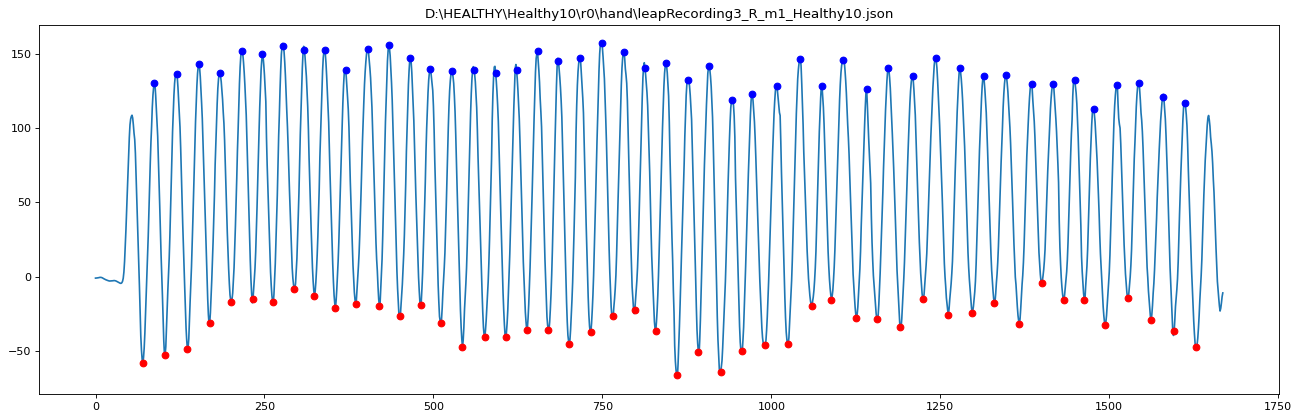

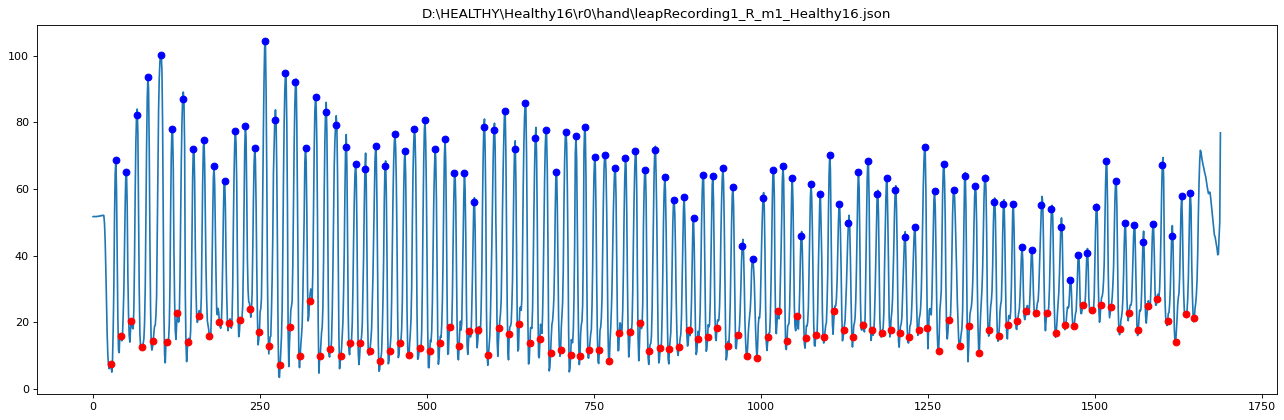

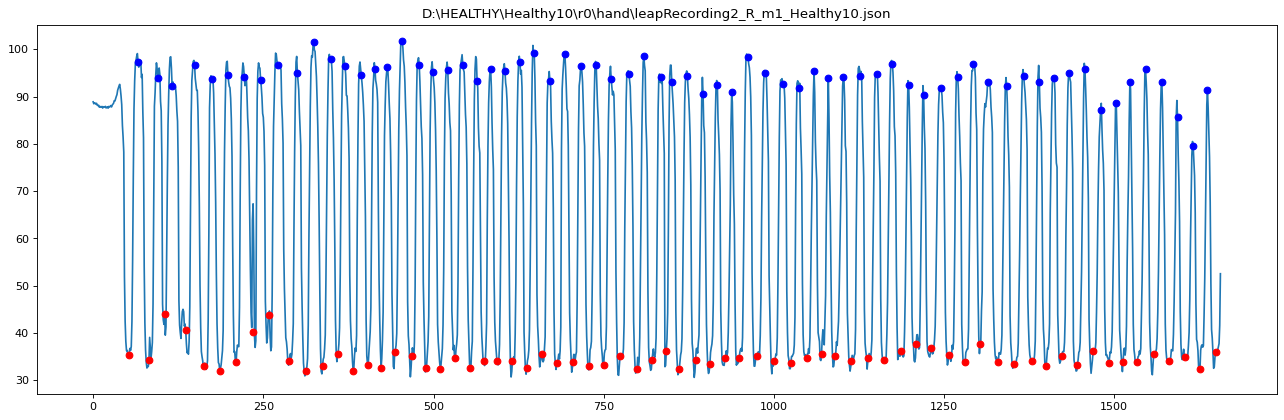

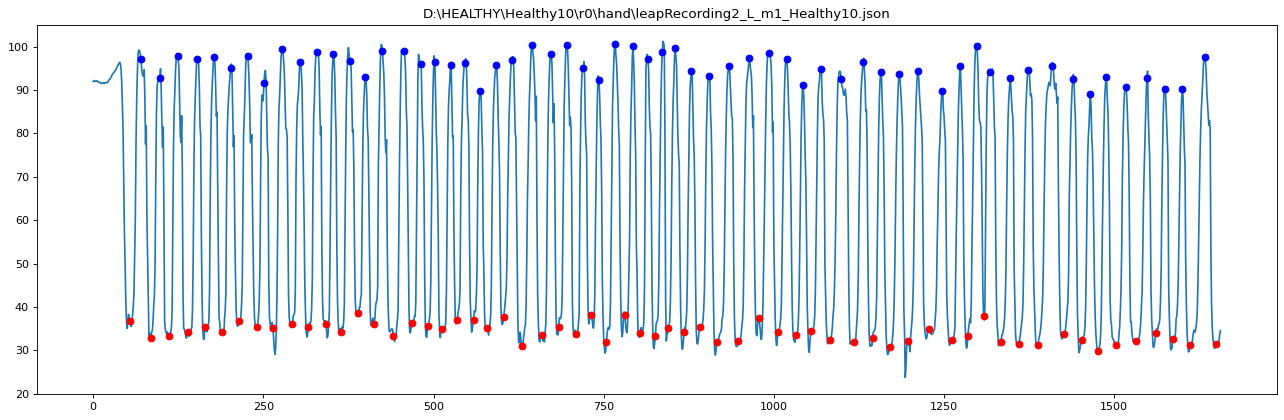

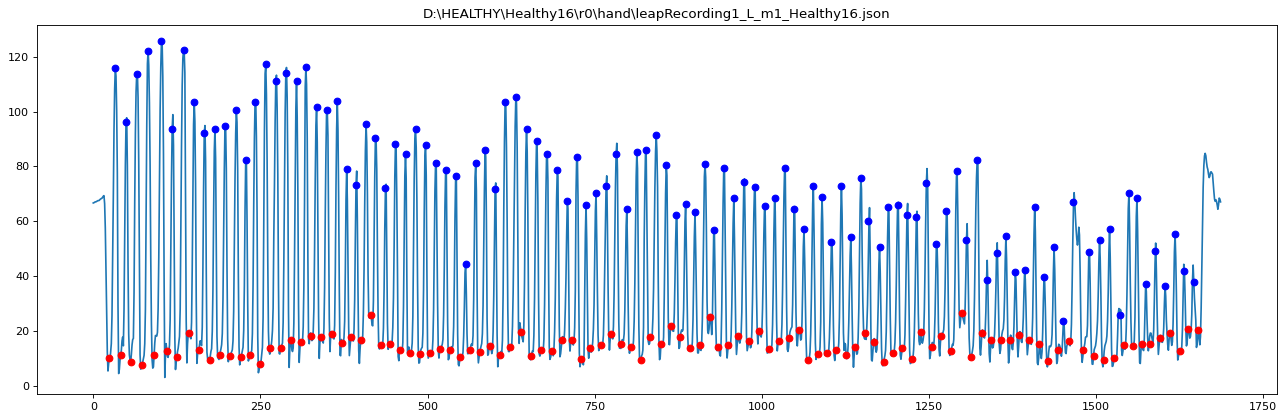

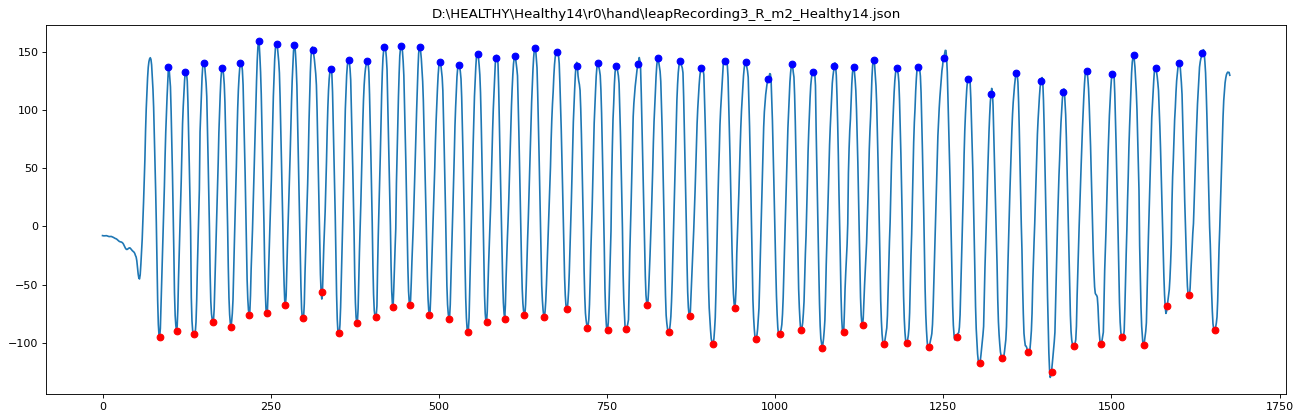

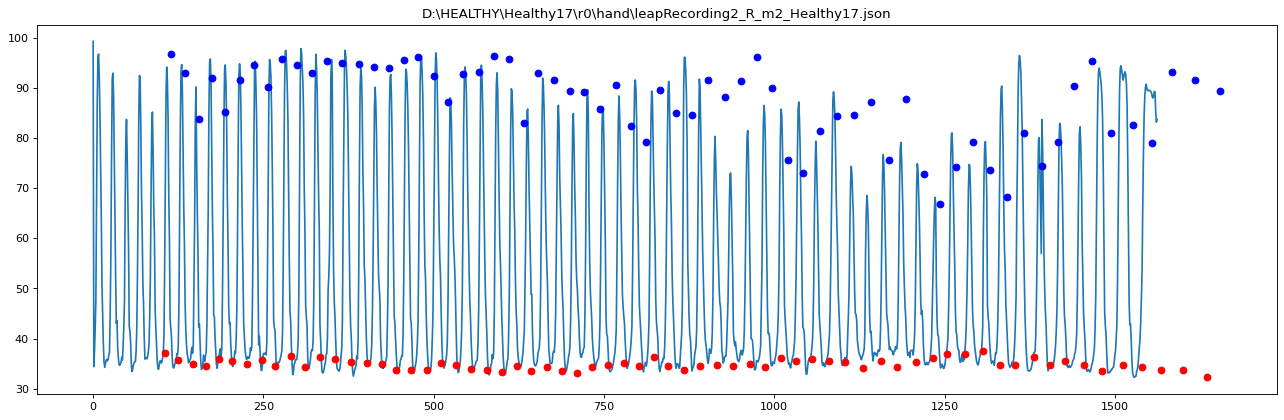

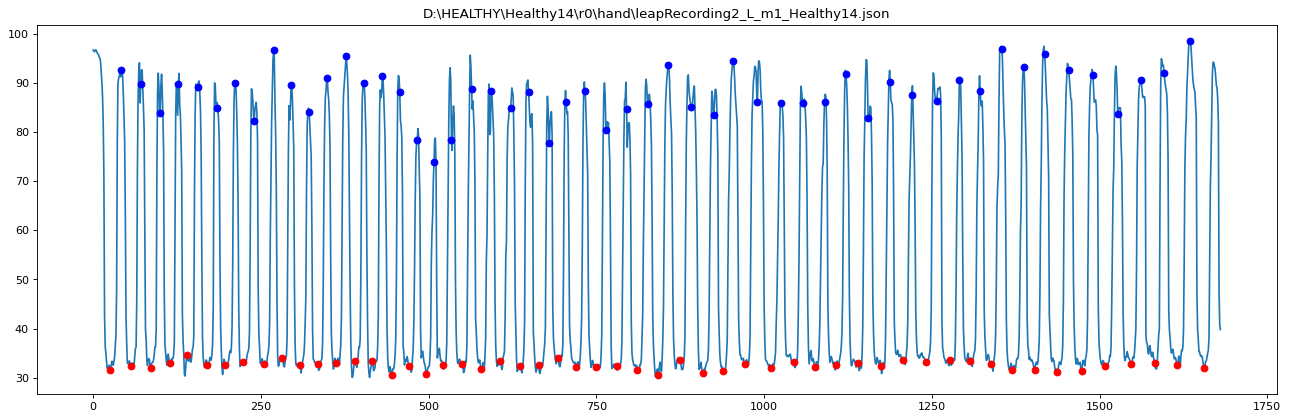

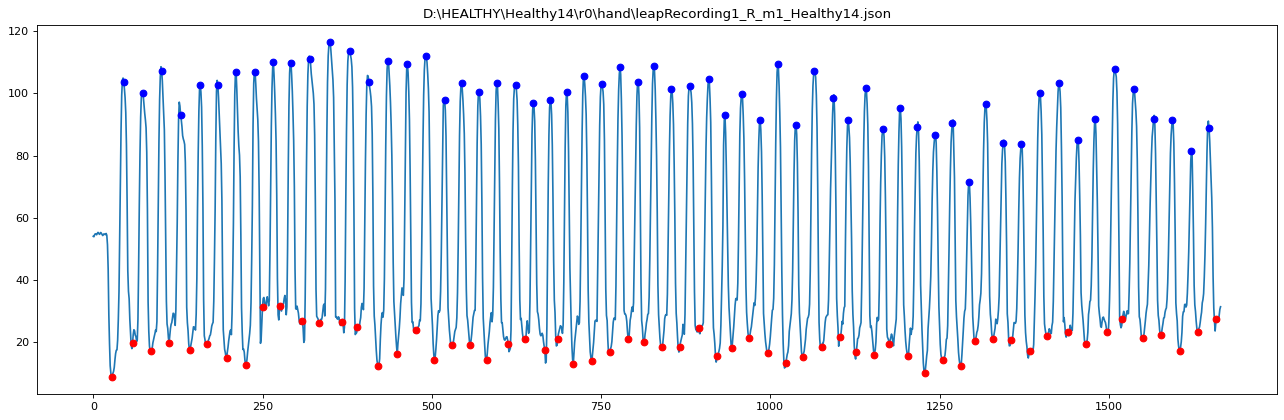

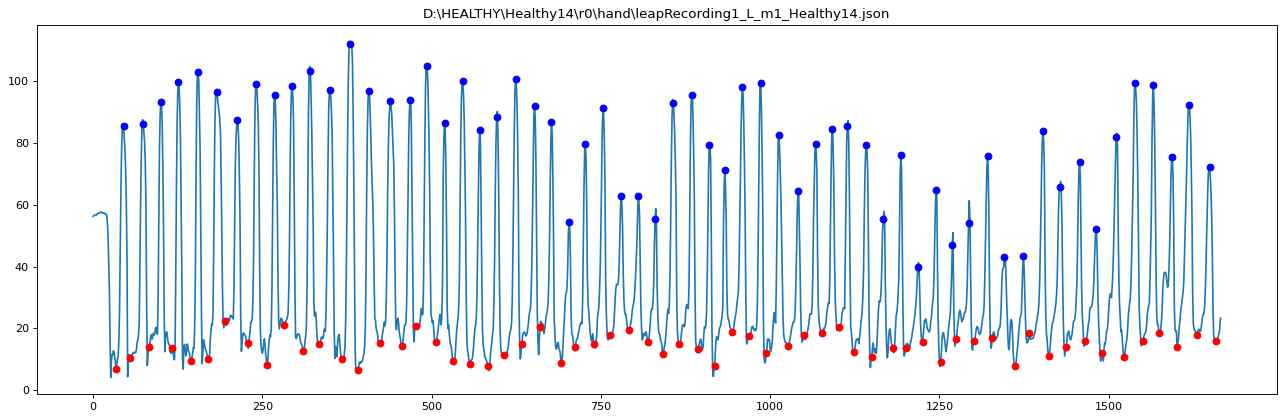

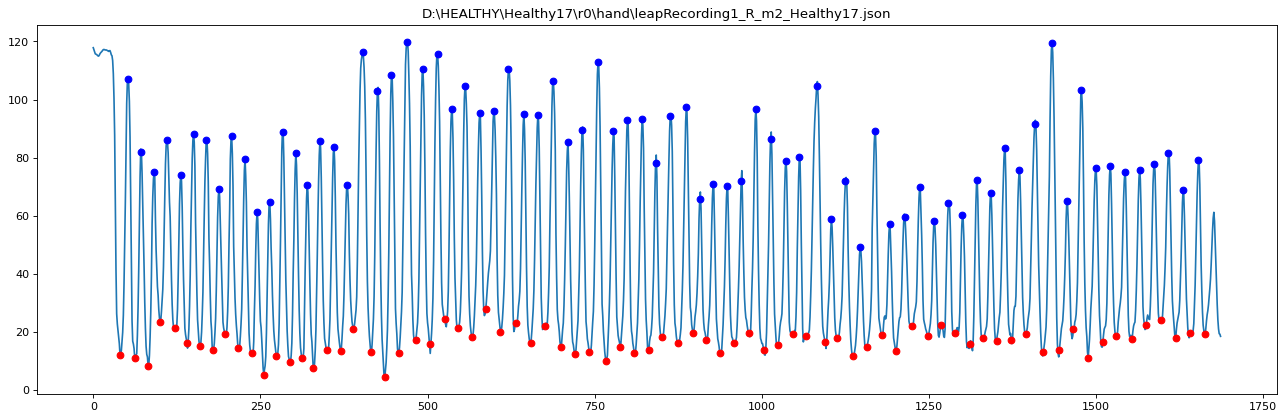

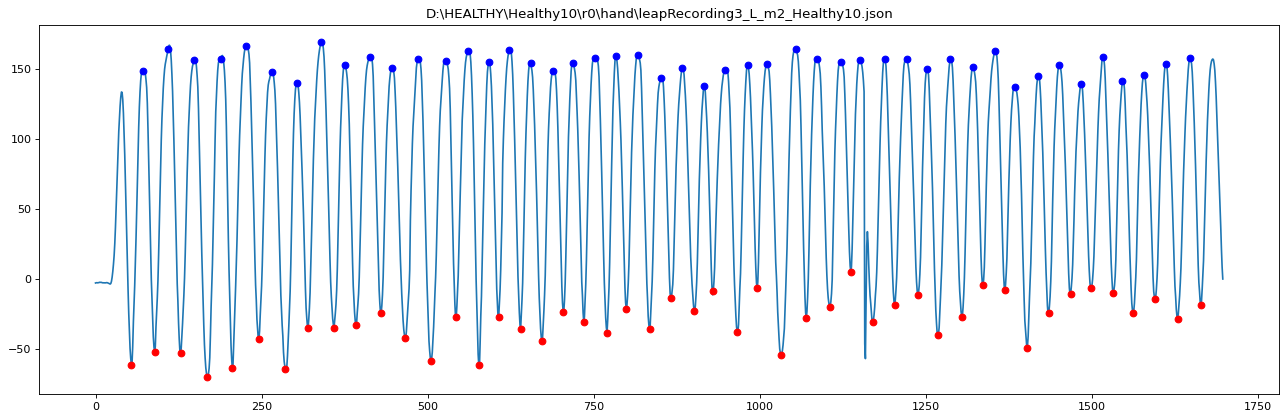

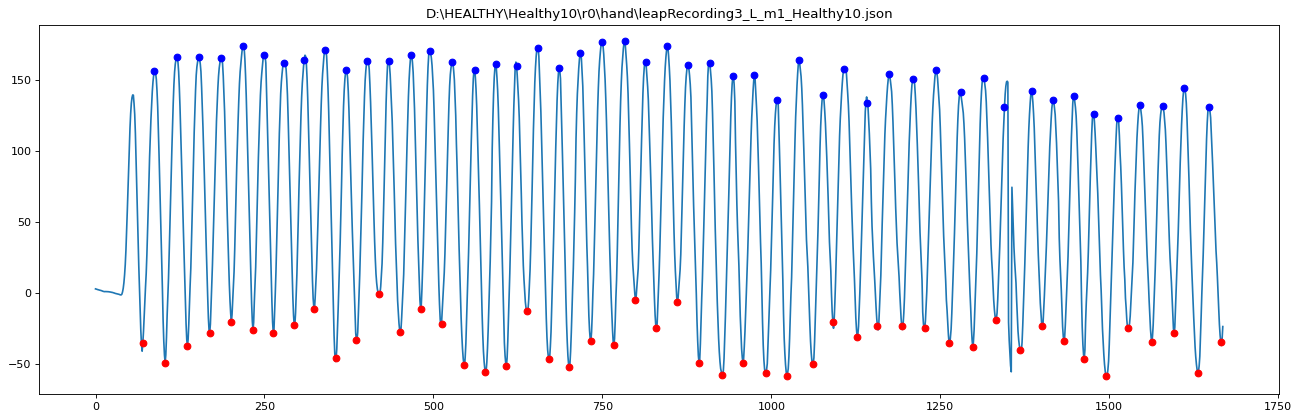

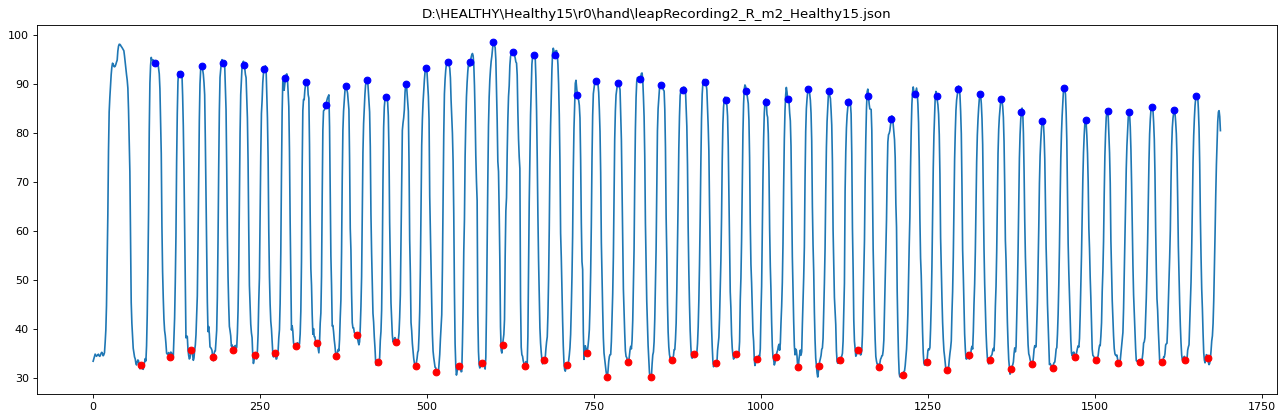

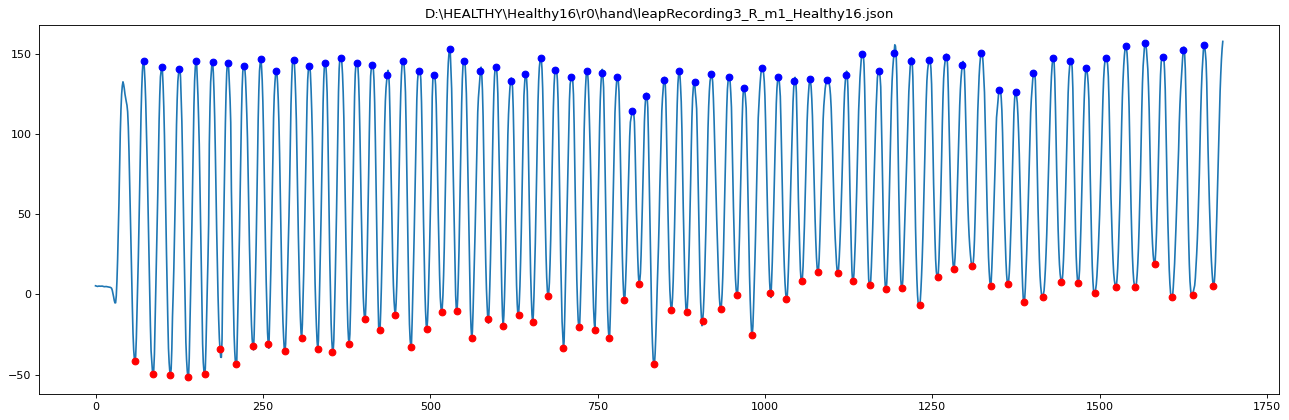

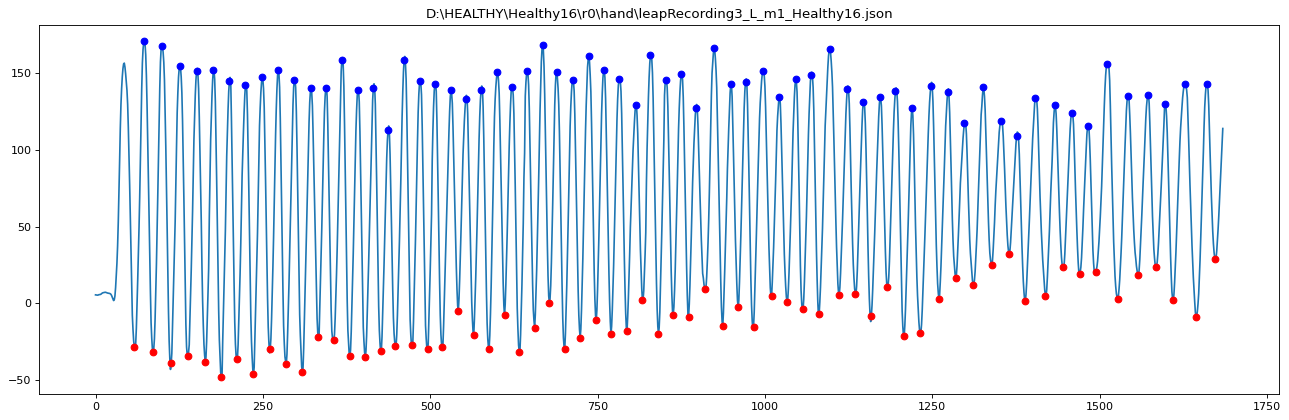

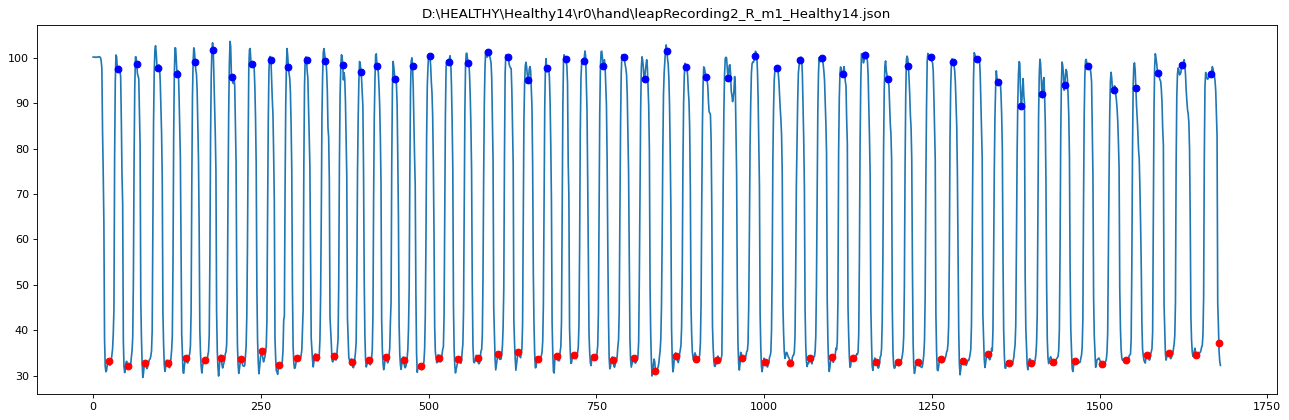

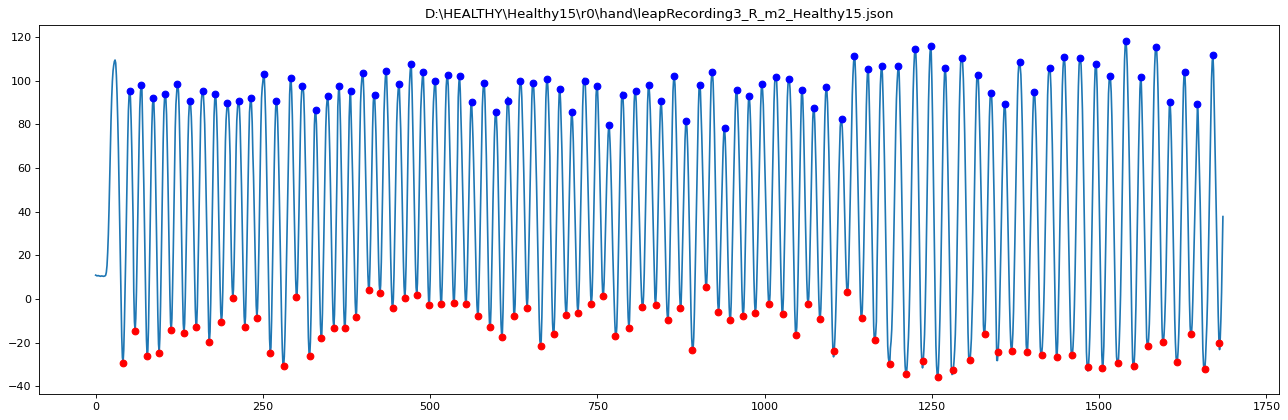

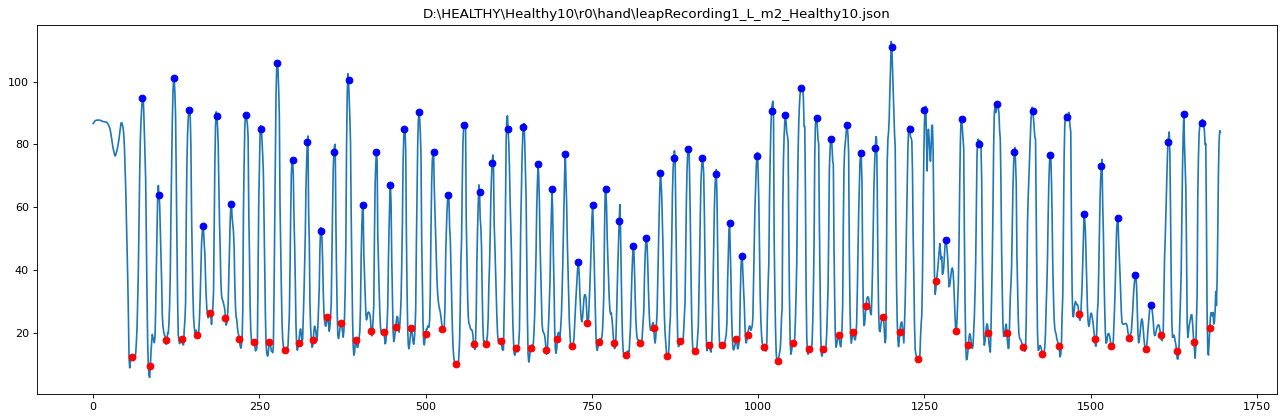

In [215]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
for j in range(len(df2)):
    path_signal = os.path.join(path_to_dir, df2.iloc[j]['folder'], df2.iloc[j]['r'],'hand',df2.iloc[j]['json'])
    path_point = os.path.join(path_to_dir, df2.iloc[j]['folder'], df2.iloc[j]['r'],'mannual_point',df2.iloc[j]['mannual_point'])
    typeHand = 0 if df2.iloc[j]['hand']=='L' else 1
    #print(typeHand, df2.iloc[j]['exersise'])
    frame,znach,point= plot_signals(typeHand, int(df2.iloc[j]['exersise']), path_signal, path_point)
    figure(figsize=(20, 6), dpi=80)
    plt.plot(znach)
    for i in range(len(point)):
        if point[i]['Type']==0:
            plt.plot(point[i]['X'], point[i]['Y'], 'o', color = 'red')
        else:
            plt.plot(point[i]['X'], point[i]['Y'], 'o', color = 'blue')
    plt.title(os.path.join(path_to_dir, df2.iloc[j]['folder'], df2.iloc[j]['r'],'hand',df2.iloc[j]['json']))
    plt.show()

    
    


In [85]:
path_to_dir = "D:\\PD"
j = 0
path_to_mannual = os.path.join(path_to_dir, df2.iloc[j]['folder'], df2.iloc[j]['r'],'mannual_point',df2.iloc[j]['mannual_point'])
data = json.load(open(path_to_mannual))
print(len(data))
signal_x = []
for i in range(len(data)):
    signal_x.append(data[i]['X'])
signal_x[-1]

147


1718.0

In [239]:
df = pd.read_csv(r'D:\PDResearch\experiments\feature_extraction\runs\2024-08-17_18-52-03\feature_dataset.csv')
df[df['DecV_FT']==-1]

Unnamed: 0  index   m hand  NumA_FT  AvgFrq_FT  VarFrq_FT  AvgVopen_FT  \
75           75      1  m1    R     -1.0       -1.0       -1.0         -1.0   
163         163      1  m1    R     -1.0       -1.0       -1.0         -1.0   
164         164      2  m2    L     -1.0       -1.0       -1.0         -1.0   
165         165      3  m2    R     -1.0       -1.0       -1.0         -1.0   
183         183      1  m1    R     -1.0       -1.0       -1.0         -1.0   
190         190      0  m1    L     -1.0       -1.0       -1.0         -1.0   
200         200      1  m1    R     -1.0       -1.0       -1.0         -1.0   
202         202      3  m2    R     -1.0       -1.0       -1.0         -1.0   
224         224      1  m1    R     -1.0       -1.0       -1.0         -1.0   
269         269      0  m1    L     -1.0       -1.0       -1.0         -1.0   
270         270      1  m1    R     -1.0       -1.0       -1.0         -1.0   
271         271      2  m2    L     -1.0       -1.0       -1.0         -1.0   
290         290      1  m1    R     -1.0       -1.0       -1.0         -1.0   

     AvgVclose_FT  AvgA_FT  ...   DA_Fear  DA_Happiness  DA_Sadness  \
75           -1.0     -1.0  ...  3.117234      5.862817    2.153286   
163          -1.0     -1.0  ...  3.153239      2.681848    2.885750   
164          -1.0     -1.0  ...  3.153239      2.681848    2.885750   
165          -1.0     -1.0  ...  3.153239      2.681848    2.885750   
183          -1.0     -1.0  ...  2.951856      2.566953    1.733151   
190          -1.0     -1.0  ...  1.857296      2.804919    2.169321   
200          -1.0     -1.0  ...  3.057616      3.448913    3.833102   
202          -1.0     -1.0  ...  3.057616      3.448913    3.833102   
224          -1.0     -1.0  ...  5.350688      6.394906    2.342863   
269          -1.0     -1.0  ...  1.264906      2.523197    2.442443   
270          -1.0     -1.0  ...  1.264906      2.523197    2.442443   
271          -1.0     -1.0  ...  1.264906      2.523197    2.442443   
290          -1.0     -1.0  ...  1.599782      3.527300    1.219425   

     DA_Surprise  DI_Anger  DI_Disgust   DI_Fear  DI_Happiness  DI_Sadness  \
75      3.684748  3.306080    3.698819  3.597776      3.932911    4.466136   
163     2.819550  4.230100    2.790372  4.894660      1.927854    3.301169   
164     2.819550  4.230100    2.790372  4.894660      1.927854    3.301169   
165     2.819550  4.230100    2.790372  4.894660      1.927854    3.301169   
183     2.268203  4.445111    3.831230  4.836147      5.440348    2.202910   
190     1.426070  3.060538    4.287655  1.613011      2.942738    1.588110   
200     5.435072  3.028188    4.925064  4.696354      4.043987    4.863663   
202     5.435072  3.028188    4.925064  4.696354      4.043987    4.863663   
224     4.929220  5.353834    6.442519  1.576624      3.231165    1.719539   
269     1.636306  1.865168    5.633672  1.970564      5.190797    1.985302   
270     1.636306  1.865168    5.633672  1.970564      5.190797    1.985302   
271     1.636306  1.865168    5.633672  1.970564      5.190797    1.985302   
290     2.125510  3.046515    4.722425  1.936423      4.513666    2.428624   

     DI_Surprise  
75      3.796273  
163     3.130743  
164     3.130743  
165     3.130743  
183     5.331424  
190     2.424691  
200     3.474106  
202     3.474106  
224     2.552810  
269     3.208991  
270     3.208991  
271     3.208991  
290     3.169698  

[13 rows x 127 columns]

In [240]:
import cv2
cap = cv2.VideoCapture(r'D:\HEALTHY\Healthy1\r0\face\p1_Healthy1.mp4')
fps = cap.get(cv2.CAP_PROP_FPS)

In [241]:
fps

60.0

In [31]:
df = pd.read_csv(r'D:\PDResearch\experiments\feature_extraction\runs\2024-08-18_22-10-33\feature_dataset.csv')
list(df.columns)

['Unnamed: 0',
 'index_x',
 'm',
 'hand',
 'NumA_FT',
 'AvgFrq_FT',
 'VarFrq_FT',
 'AvgVopen_FT',
 'AvgVclose_FT',
 'AvgA_FT',
 'VarA_FT',
 'VarVopen_FT',
 'VarVclose_FT',
 'DecA_FT',
 'DecV_FT',
 'NumA_OC',
 'AvgFrq_OC',
 'VarFrq_OC',
 'AvgVopen_OC',
 'AvgVclose_OC',
 'AvgA_OC',
 'VarA_OC',
 'VarVopen_OC',
 'VarVclose_OC',
 'DecA_OC',
 'DecV_OC',
 'NumA_PS',
 'AvgFrq_PS',
 'VarFrq_PS',
 'AvgVopen_PS',
 'AvgVclose_PS',
 'AvgA_PS',
 'VarA_PS',
 'VarVopen_PS',
 'VarVclose_PS',
 'DecA_PS',
 'DecV_PS',
 'id',
 'r',
 'dataset',
 'age',
 'gender',
 'stage',
 'year',
 'UPDRS_3',
 'UPDRS_1_2_4',
 'UPDRS',
 'UPDRS_HAND_FACE',
 'UPDRS_mimic',
 '3.4a_FT',
 '3.4b_FT',
 '3.5a_OC',
 '3.5b_OC',
 '3.6a_PS',
 '3.6b_PS',
 'face data quality',
 'hand data quality',
 'path_to_folder',
 'NumADiff_FT',
 'AvgFrqDiff_FT',
 'VarFrqDiff_FT',
 'AvgVopenDiff_FT',
 'AvgVcloseDiff_FT',
 'AvgADiff_FT',
 'VarADiff_FT',
 'VarVopenDiff_FT',
 'VarVcloseDiff_FT',
 'DecADiff_FT',
 'DecVDiff_FT',
 'NumADiff_OC',
 'AvgFrqDi

In [7]:
pd.DataFrame([{'name':'jdhgj', 'hfgj': 'jfnm'}],index=[0])

name  hfgj
0  jdhgj  jfnm

In [10]:
pd.concat([pd.DataFrame(), pd.DataFrame([{'name':'jdhgj', 'hfgj': 'jfnm'}])])

name  hfgj
0  jdhgj  jfnm

In [25]:
df = pd.read_csv(r'D:\PDResearch\experiments\feature_extraction\runs\2024-08-18_23-50-53\feature_dataset.csv')
df = df[['id', 'dataset','r', 'm', 'hand', 'Fmean_FORE_TIP', 'Amean_FORE_TIP', 'Fmax_FORE_TIP', 'Amax_FORE_TIP']].dropna()
#df = df[df['Amean_FORE_TIP']<1000]
df

id  dataset  r   m hand  Fmean_FORE_TIP  Amean_FORE_TIP  \
108  Patient29       PD  0  m2    L        0.053419      187.837486   
109  Patient29       PD  0  m2    R        0.044350      287.704247   
110  Patient30       PD  0  m1    L        0.035674      111.550290   
111  Patient30       PD  0  m1    R        0.043215       92.821327   
114  Patient31       PD  0  m1    L        0.061551      231.479428   
..         ...      ... ..  ..  ...             ...             ...   
568  student13  STUDENT  0  m1    R        0.046838      230.135814   
569  student14  STUDENT  0  m1    L        0.091075       73.098837   
570  student14  STUDENT  0  m1    R        0.046232       94.123332   
571  student15  STUDENT  0  m1    L        0.045537      182.394175   
572  student15  STUDENT  0  m1    R        0.035537      267.647868   

     Fmax_FORE_TIP  Amax_FORE_TIP  
108       0.053419     278.978613  
109       0.053220     449.479180  
110       0.042808     220.721526  
111       0.043215     116.814258  
114       0.123102     326.435583  
..             ...            ...  
568       0.046838     371.406263  
569       0.204918     117.085896  
570       0.046232     145.385903  
571       0.045537     283.641381  
572       0.042644     362.820892  

[147 rows x 9 columns]

In [27]:
df[df['Amax_FORE_TIP']>1000]

id  dataset  r   m hand  Fmean_FORE_TIP  Amean_FORE_TIP  \
119  Patient32       PD  0  m1    R        0.022635     4852.246804   
148  Patient39       PD  0  m2    L        0.139616     1041.139611   
198  Patient56       PD  0  m1    L        0.042280     1201.905388   
236  Patient65       PD  0  m2    L        0.068993     1264.735071   
272  Patient75       PD  0  m1    L        0.376041     1990.458379   
320  Patient90       PD  0  m1    L        0.081733      874.093638   
322  Patient90       PD  0  m2    L        0.082406      668.643336   
341  Patient95       PD  0  m2    L        0.035162      634.129690   
559   student9  STUDENT  0  m1    L        0.079676      776.036717   

     Fmax_FORE_TIP  Amax_FORE_TIP  
119       0.022635    8261.439043  
148       0.261780    1817.486150  
198       0.050736    1623.289307  
236       0.088705    1639.404999  
272       1.067687    2753.364170  
320       0.183899    1463.775925  
322       0.103008    1041.518951  
341       0.042194    1225.666924  
559       0.195567    1653.243183

(array([14., 10.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 52.4840296 , 124.83929831, 197.19456701, 269.54983571,
        341.90510442, 414.26037312, 486.61564183, 558.97091053,
        631.32617923, 703.68144794, 776.03671664]),
 <BarContainer object of 10 artists>)

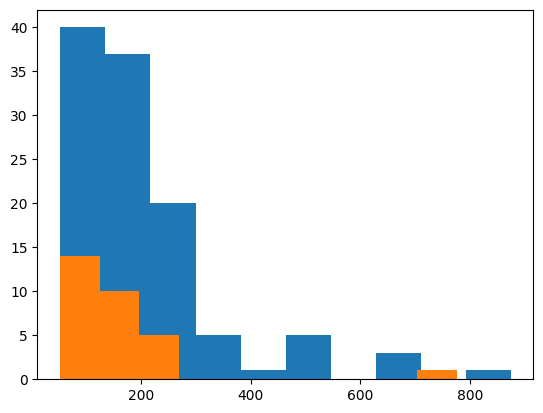

In [23]:
plt.hist(df[df['dataset']=='PD']['Amean_FORE_TIP'])
plt.hist(df[df['dataset']=='STUDENT']['Amean_FORE_TIP'])